## Exploratory Data Analysis-EDA (Análisis exploratorio de los datos)

* Librerias Necesarias

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

Incialmente se van a analizar los DataFrames de Kindle Store, Home and Kitchen, Appliances, Industrial and Scientific y Office Products con sus respectivos archivos meta.

* Cargar datos

In [ ]:
# Archivos de review
Kindle_Store = pd.read_parquet('Kindle_Store.parquet')
Home_and_Kitchen = pd.read_parquet('Home_and_Kitchen.parquet')
Appliances = pd.read_parquet('Appliances.parquet')
Industrial_and_Scientific = pd.read_parquet('Industrial_and_Scientific.parquet')
Office_Products = pd.read_parquet('Office_Products.parquet')

# Archivos de meta
meta_Appliances = pd.read_parquet('meta_Appliances.parquet')
meta_Home_and_Kitchen = pd.read_parquet('meta_Home_and_Kitchen.parquet')
meta_Industrial_and_Scientific = pd.read_parquet('meta_Industrial_and_Scientific.parquet')
meta_Kindle_Store = pd.read_parquet('meta_Kindle_Store.parquet')
meta_Office_Products = pd.read_parquet('meta_Office_Products.parquet')

En este análisis, se examinará la distribución y la evolución de los datos, centrándose en la evaluación del puntaje y el precio en relación con las categorías y los artículos, así como otras variaciones en los datos. Dado que los conjuntos de datos comparten prácticamente las mismas columnas, no tiene sentido realizar el mismo análisis para todos ellos. Por lo tanto, se revisarán los diferentes conjuntos de datos con enfoques específicos para cada uno.






    - ¿Cúal es la distribución de los puntajes en las categorías Kindle Store, Home and Kitchen, Appliances, Industrial and Scientific y Office Products?

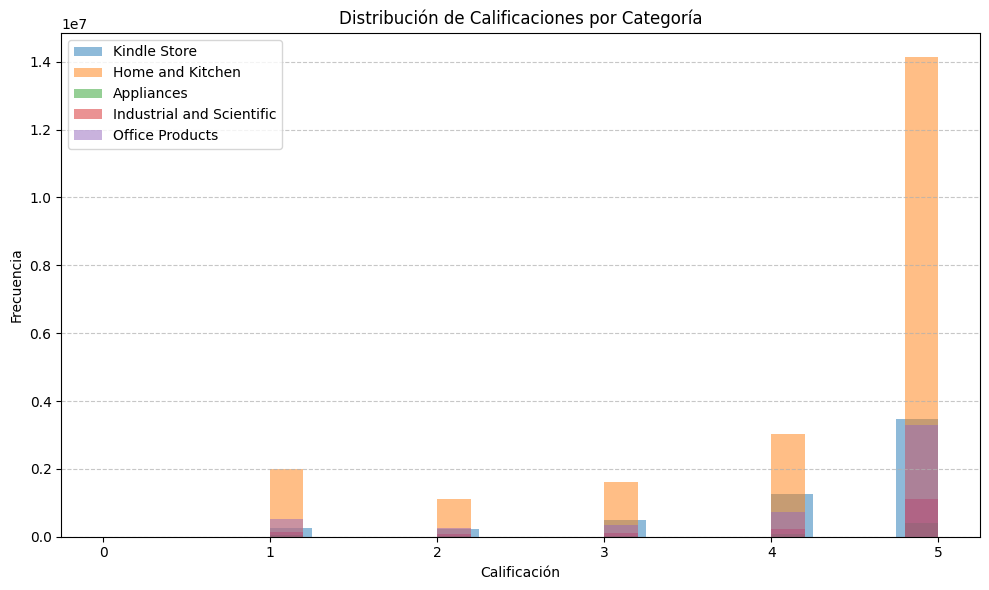

In [30]:
# Extraer el puntaje de cada DataSet
scores_Kindle_Store = list(Kindle_Store['overall'])
scores_Home_and_Kitchen = list(Home_and_Kitchen['overall'])
scores_Appliances = list(Appliances['overall'])
scores_Industrial_and_Scientific = list(Industrial_and_Scientific['overall'])
scores_Office_Products = list(Office_Products['overall'])

# Lista de puntuaciones de cada DataFrame
scores = [scores_Kindle_Store, scores_Home_and_Kitchen, scores_Appliances, 
          scores_Industrial_and_Scientific, scores_Office_Products]

# Nombres de las categorías
categories = ['Kindle Store', 'Home and Kitchen', 'Appliances',
              'Industrial and Scientific', 'Office Products']

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico
for i, category_scores in enumerate(scores):
    plt.hist(category_scores, bins=20, alpha=0.5, label=categories[i])

plt.title('Distribución de Calificaciones por Categoría')
plt.xlabel('Puntaje')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



En el análisis de la distribución de puntajes por categoría, se destaca que la categoría "Home and Kitchen" es la más densamente poblada en términos de información y exhibe un predominio en casi todos los niveles de puntaje en comparación con las demás categorías. Asimismo, es notable que la mayoría de las categorías presentan una alta concentración de elementos con una calificación de cinco sobre cinco.

No obstante, resulta fundamental dirigir la atención hacia aquellos elementos que recibieron calificaciones bajas en todas las categorías. Examinar estos casos permitirá identificar oportunidades de mejora y comprender las áreas en las que los productos pueden no estar cumpliendo con las expectativas de los usuarios.

    - ¿Cúales son las 10 marcas con mayor presencia entre las categorías Kindle Store, Home and Kitchen, Appliances, Industrial and Scientific y Office Products?

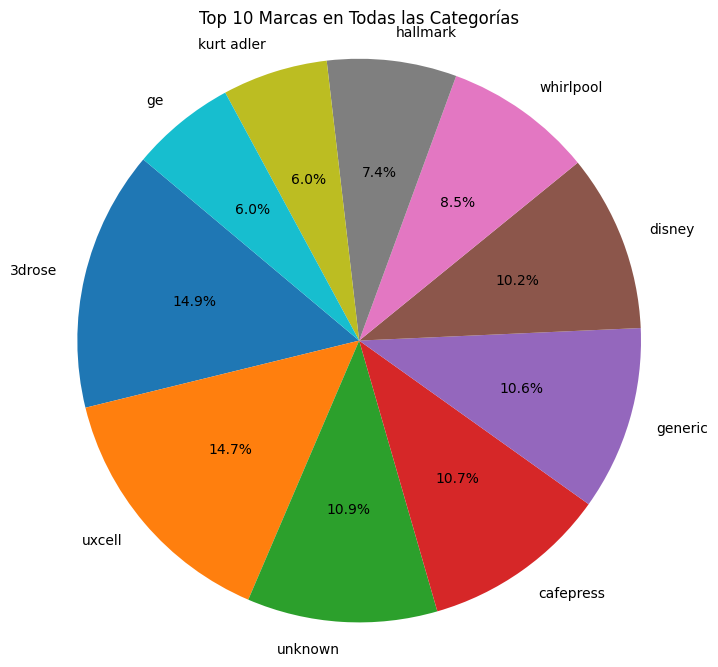

In [44]:
# Extraer las marcas de los DataFrame de meta
brand_counts_appliances = meta_Appliances['brand'].value_counts()
brand_counts_home_kitchen = meta_Home_and_Kitchen['brand'].value_counts()
brand_counts_Industrial_and_Scientific = meta_Industrial_and_Scientific['brand'].value_counts()
brand_counts_Kindle_Store = meta_Kindle_Store['brand'].value_counts()
brand_counts_Office_Products = meta_Office_Products['brand'].value_counts()

# Crear un DataFrame combinado con los recuentos de marcas de todas las categorías
brand_counts_combined = pd.concat([brand_counts_appliances, brand_counts_home_kitchen, 
                                   brand_counts_Industrial_and_Scientific, brand_counts_Kindle_Store, 
                                   brand_counts_Office_Products])

# Sumar los recuentos de marcas por marca (agregar los valores para cada marca)
brand_counts_combined = brand_counts_combined.groupby(brand_counts_combined.index).sum()

# Seleccionar las 10 marcas más populares
top_brands_combined = brand_counts_combined.nlargest(10)

# Crear el gráfico de pastel para las marcas más populares en todas las categorías
plt.figure(figsize=(8, 8))
plt.pie(top_brands_combined, labels=top_brands_combined.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 10 Marcas en Todas las Categorías')

# Mostrar el gráfico
plt.show()


    - ¿Cómo es la distribución del precio en cada categoría? (Identificación de Outliers)

En relación a las marcas identificadas con una mayor presencia a través de múltiples categorías, podría ser beneficioso considerar estrategias para fortalecer aún más su posición en el mercado. Estas marcas, al tener una amplia gama de productos en Amazon, poseen una base sólida de consumidores. Además, si un usuario ha recomendado una marca en particular, es probable que tenga una preferencia continua por esa misma marca en sus futuras compras. Por lo tanto, enfocar esfuerzos en el desarrollo y promoción de estas marcas podría generar un impacto positivo en términos de lealtad del cliente y ventas adicionales.






C:\Users\Leidy Hernandez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Leidy Hernandez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Leidy Hernandez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is

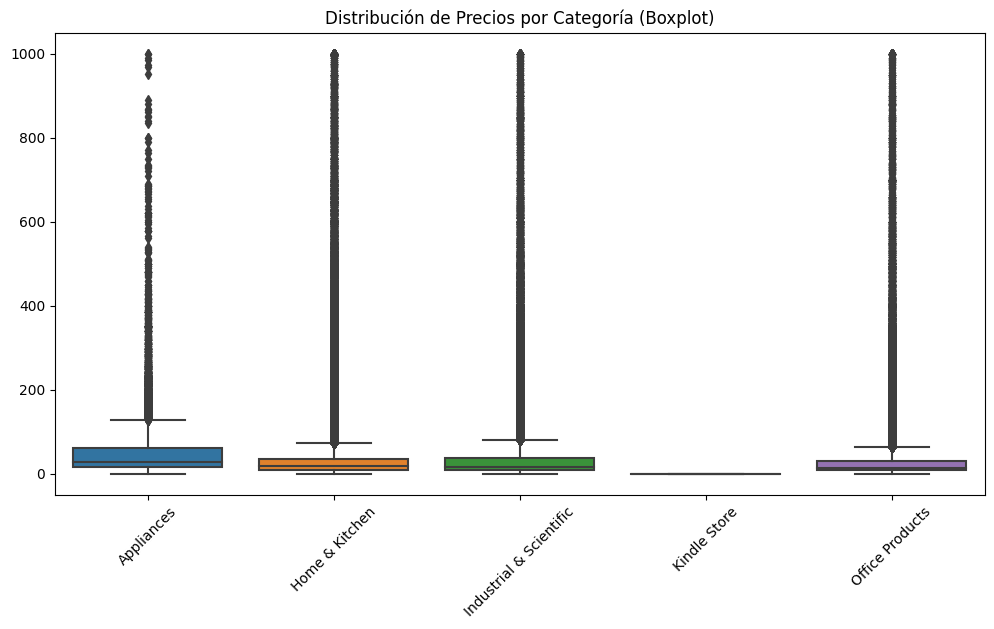

In [50]:
# Extraer los precios de los DataFrame de meta
price_appliances = list(meta_Appliances['price'])
price_home_kitchen = list(meta_Home_and_Kitchen['price'])
price_Industrial_and_Scientific = list(meta_Industrial_and_Scientific['price'])
price_Kindle_Store = list(meta_Kindle_Store['price'])
price_Office_Products = list(meta_Office_Products['price'])

# Crear un DataFrame con los precios de todas las categorías
data = {
    'Category': ['Appliances'] * len(price_appliances) + ['Home & Kitchen'] * len(price_home_kitchen) +
                ['Industrial & Scientific'] * len(price_Industrial_and_Scientific) + 
                ['Kindle Store'] * len(price_Kindle_Store) + ['Office Products'] * len(price_Office_Products),
    'Price': price_appliances + price_home_kitchen + price_Industrial_and_Scientific + price_Kindle_Store + price_Office_Products
}

# Crear un gráfico de caja y bigotes
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Price', data=data)
plt.title('Distribución de Precios por Categoría (Boxplot)')
plt.xticks(rotation=45)
plt.show()


El gráfico anterior ilustra la distribución de precios en cada categoría. Considerando esta información, se abre la posibilidad de explorar recomendaciones de productos basadas en su precio y categoría en el futuro. Sin embargo, es fundamental realizar un análisis adicional para comprender la relación entre la probabilidad de compra y el precio de los artículos antes de implementar dichas recomendaciones.






Finalizado el anterior análisis ahora se van a tomar los DataSets de Cell_Phones_and_Accessories, Clothing_Shoes_and_Jewelry, Musical_Instruments, Pet_Supplies y sus metadata. 

In [41]:
archivos = ['datasets_parquet/Cell_Phones_and_Accessories.parquet.gzip','datasets_parquet/Clothing_Shoes_and_Jewelry.parquet.gzip','datasets_parquet/Musical_Instruments.parquet.gzip','datasets_parquet/Pet_Supplies.parquet.gzip']

In [59]:
metadatas = ['metadata_parquet/meta_Cell_Phones_and_Accessories.parquet.gzip','metadata_parquet/meta_Clothing_Shoes_and_Jewelry.parquet.gzip','metadata_parquet/meta_Musical_Instruments.parquet.gzip','metadata_parquet/meta_Pet_Supplies.parquet.gzip']

# Registros duplicados

## Reviews

In [42]:
dataframes = []
for dataset in archivos:
    df = pd.read_parquet(dataset)
    dataframes.append(df)

In [43]:
concatenated_dfs = pd.concat(dataframes)

In [53]:
concatenated_dfs[concatenated_dfs.duplicated(subset=['reviewerID','reviewText','unixReviewTime'])]

,reviewerID,asin,reviewerName,reviewText,overall,summary,unixReviewTime
8565,a36al809oxaz1b,B0006I3W1K,"arm ""music expert""",comfort and beauty sometimes don't go together...,5,best of the best,1400716800
68433,a3h36a0ewlkjej,B001LNCAPS,"j. burton ""jb""",nice shirt,4,four stars,1404172800
80019,aiif5a8tv0xib,B002BZZUUM,mercedes c,"i've been organizing my self, and they are rea...",5,good,1331769600
84351,a1l08o60mxpcya,B002KE5E32,"walter monserratte ""waltermon""","great shoes. good construction, excellent anti...",5,great shoes,1358467200
86558,aw46uxkjafa5t,B002NY1OJW,ka,first off i have to say i love these shoes wit...,5,best shoes ever! read this to learn how to el...,1390608000
...,...,...,...,...,...,...,...
192524,a22e1xrkaq2zpp,B00JBJ3HTW,kenyon,i have had many different smartwatches and the...,5,best smartwatch ever!!!!,1405900800
192525,a3u41zl33ss92p,B00JBJ3HTW,"kevin nicholls ""jaded, aging hipster""",i've been interested in horology since i was a...,4,look at me! i'm dick tracy!,1397606400
192527,a39gjjt0h2bzh9,B00JBJ3HTW,mike,"just received my gear 2 neo in mocha grey, and...",4,"functional, but rough around the edges",1397088000
192528,a27gittn6avw5i,B00JBJ3HTW,"morimoto ""morimoto""",i've worn both the gear fit and gear 2 neo sep...,2,"wait for this market segment to mature, fitnes...",1398816000


In [57]:
concatenated_dfs[concatenated_dfs.duplicated(keep='first')].sort_values('unixReviewTime')

,reviewerID,asin,reviewerName,reviewText,overall,summary,unixReviewTime
13199,a1z54em24y40ll,B0007YXUS8,csm,i just love this bra. i was first introduced ...,5,absolutely my favorite!,1090022400
2017,a2k3j2x8kdy47n,B0000B35EL,"jewelry lover ""me""",for $10 these were too good to pass up. first...,2,quality is slipping,1095984000
2074,ab2yza2hly75h,B0000B35GE,reb,"beautiful, shiny, sturdy and well constructed,...",5,lovely,1096416000
1963,ab2yza2hly75h,B0000B35D9,reb,"i purchased these for a teenage cousin, and th...",5,agree with momof2,1096416000
2034,aappwnp9fwvws,B0000B35EM,"kathlyn storey ""kathlyn a storey""","these earrings just arrived, and for $10 (frid...",5,terrific value for gold earrings,1102464000
...,...,...,...,...,...,...,...
245248,a38vcivae3oxd3,B00B2HWCM4,j,this is for winter... it is very warm. but m...,5,beautiful,1405987200
265103,a3uj0ohvuyah1s,B00DQYNS3I,karineh,i will be buying more .... so many colors to c...,5,o m g ! !,1405987200
274947,a1n9kyvo2ihbz1,B00G00MOM6,"l. pollara ""shore guy""",i bought this skirt in black and was so thrill...,5,another,1406073600
275045,a2kgi8dk90ang2,B00G2T8YAQ,judi from chicago,"these are adorable, very inexpensive gifts. ta...",5,great value/cute watches,1406073600


## Metadata

In [60]:
metadata_dfs = []
for metadata in metadatas:
    df = pd.read_parquet(metadata)
    metadata_dfs.append(df)

In [62]:
concatenated_metadfs = pd.concat(metadata_dfs)

In [71]:
concatenated_metadfs[concatenated_metadfs.duplicated(subset=['asin'])]

,description,title,brand,rank,main_cat,price,asin,salesRank
1848,[Whether you travel the globe or just around t...,PalmOne V Leather Belt Clip Case,Palm,"[>#3,057,757 in Cell Phones & Accessories (See...",All Electronics,2.59,B00000J3Q2,NaN
1849,[],PalmOne III Deluxe Leather Case,Palm,"[>#4,146,771 in Cell Phones & Accessories (See...",All Electronics,NaN,B00000J438,NaN
1850,[You'll get plenty of power from our handy ada...,PalmOne Modem AC Adapter,Palm,"[>#7,117,198 in Cell Phones & Accessories (See...",All Electronics,NaN,B00000JHVQ,NaN
1851,"[, Specifically designed for iWatch Smart Watc...",2 Pack Apple 38mm Watch Screen Protector (38mm...,Live2Pedal,[>#122 in Cell Phones & Accessories (See Top 1...,Cell Phones & Accessories,8.99,B00001O39C,NaN
1852,[The EarHugger cellular headset features a sof...,EarHugger C9000 Cellular Headset with Boom Mic...,Ear Hugger,"[>#7,517,303 in Cell Phones & Accessories (See...",Cell Phones & Accessories,NaN,B00001OPI3,NaN
...,...,...,...,...,...,...,...,...
117454,[This Wonder Woman costume for dogs includes a...,DC Comics,Rubie's,[],Pet Supplies,19.99,B00GIBVBK8,NaN
123563,[<b>PRODUCT DETAILS:</b><br> - All natural org...,Buddy&amp;Max Probiotic Chews for Dogs - Diges...,Buddy&Max,[],Pet Supplies,27.85,B00I8V3BQ8,NaN
124864,[<b>PRODUCT DETAILS:</b><br> - All natural org...,Buddy&amp;Max Probiotic Chews for Dogs - Diges...,Buddy&Max,[],Pet Supplies,27.85,B00IKN12T2,NaN
125656,[Justin Mens Silver Cattleman Blue/Gray Boots ...,Justin Mens Silver Cattleman Blu/Gry Boots 6.5D,Justin,[],Pet Supplies,NaN,B00IT5JG62,NaN


# Nulos

## Reviews

In [73]:
concatenated_dfs.isna().sum()

reviewerID        0
asin              0
reviewerName      0
reviewText        0
overall           0
summary           0
unixReviewTime    0
dtype: int64

## Metadata

In [74]:
concatenated_metadfs.isna().sum()

description    1417942
title              688
brand          1405252
rank           1503384
main_cat       1503384
price          1564564
asin                 0
salesRank       997491
dtype: int64

Si bien hay varios nulos en distintas columnas, las dejaremos y seran dropeadas en caso de ser necesario mas adelante

# Distribucion de datos

# Reviews

In [97]:
concatenated_dfs['year'] = concatenated_dfs['unixReviewTime'].apply(lambda x: datetime.fromtimestamp(x).year)
concatenated_dfs['month'] = concatenated_dfs['unixReviewTime'].apply(lambda x: datetime.fromtimestamp(x).month)

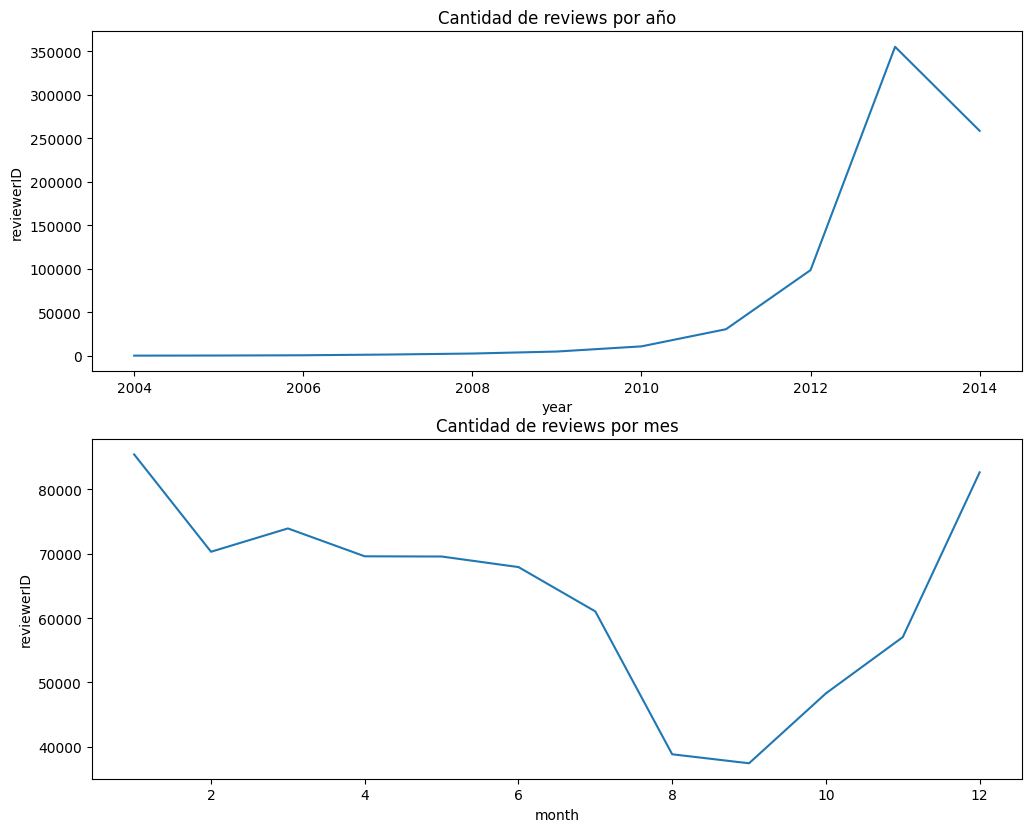

In [121]:
plt.figure(figsize=(12,15))
plt.subplot(3,1,1)
plt.title('Cantidad de reviews por año')
sns.lineplot(data=concatenated_dfs.groupby('year').count(),
             x='year',
             y='reviewerID')

plt.subplot(3,1,2)
plt.title('Cantidad de reviews por mes')
sns.lineplot(data=concatenated_dfs.groupby('month').count(),
             x='month',
             y='reviewerID'
)

plt.show()

### Promedio de calificaciones

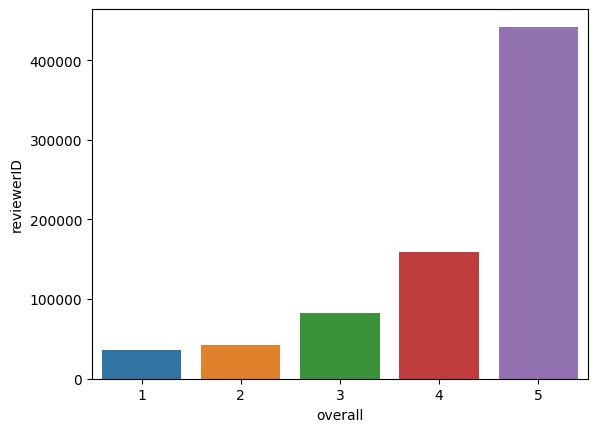

In [115]:
sns.barplot(
    data=concatenated_dfs.groupby('overall').count().reset_index(),
    x='overall',
    y='reviewerID'
)
plt.show()

### Promedio de reviews por usuario

In [120]:
concatenated_dfs.groupby('reviewerID').count()['asin'].mean()

11.553503744807301

# Metadata

## Categorias con mas productos

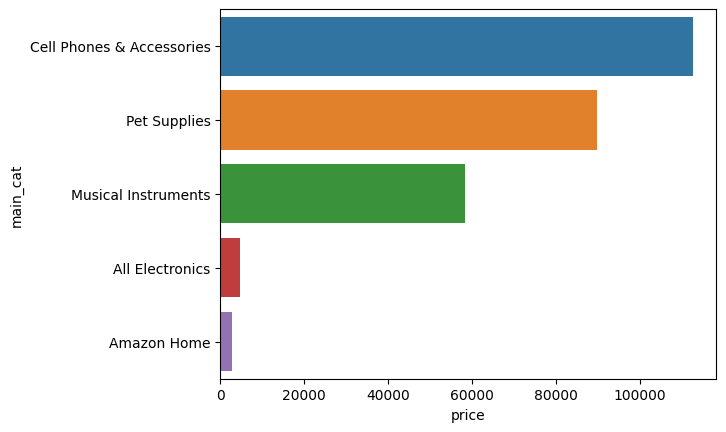

In [172]:
sns.barplot(data = concatenated_metadfs.groupby('main_cat').count().sort_values('price',ascending=False).head().reset_index(),
            x='price',
            y='main_cat')
plt.show()

## Distribucion de precios

In [131]:
# Cantidad de nulos en price
concatenated_metadfs['price'].isna().sum()

1564564

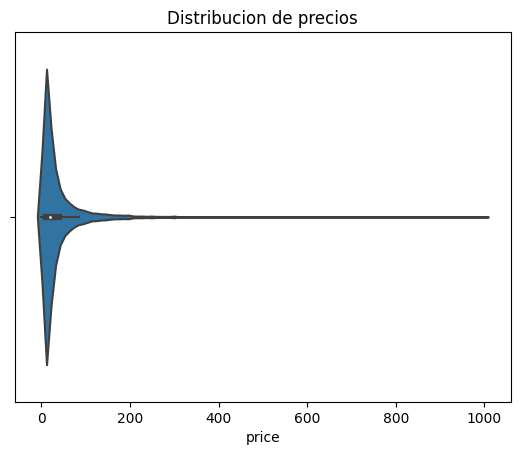

In [154]:
plt.title('Distribucion de precios')
sns.violinplot(
    data=concatenated_metadfs,
    x='price'
)
plt.show()

## Precio promedio por en categorias con mas productos

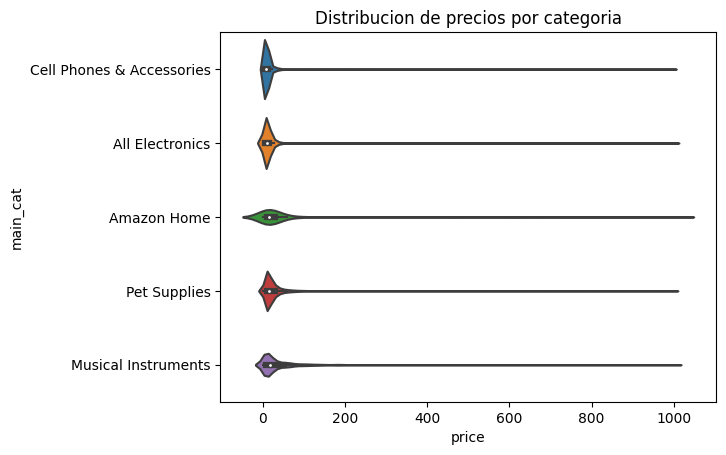

In [184]:
principales_cats = list(concatenated_metadfs.groupby('main_cat').count().sort_values('price',ascending=False).head().index)

plt.title('Distribucion de precios por categoria')
sns.violinplot(
    data=concatenated_metadfs[concatenated_metadfs['main_cat'].isin(principales_cats)],
    x='price',
    y='main_cat'
)
plt.show()

## Marcas mas vendidas por categoria

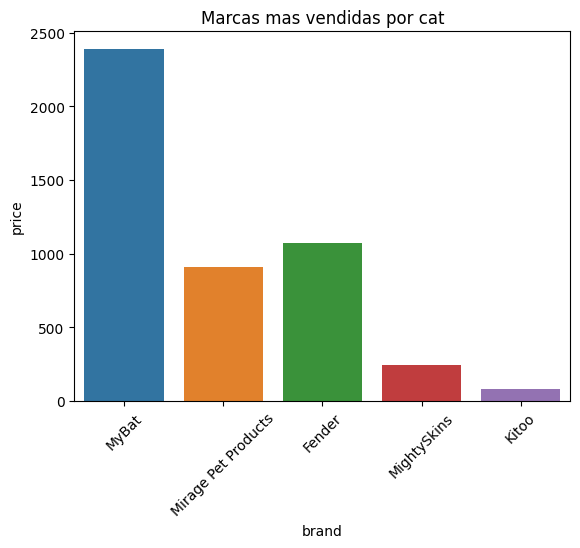

In [201]:
marcas = []
for categoria in principales_cats:
    marcas.append(concatenated_metadfs[concatenated_metadfs['main_cat']==categoria].groupby('brand').count().sort_values('price',ascending=False).head(1))
    
plt.title('Marcas mas vendidas por cat')
sns.barplot(
    data=pd.concat(marcas).reset_index(),
    x='brand',
    y='price'
    
)

ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

Ahora es el espacio para el análisis de all_beauty

In [2]:
reviews_beauty=pd.read_parquet('all_beauty2.parquet')
meta_beauty=pd.read_parquet('meta_beauty2.parquet')

Se revisara algunos datos en la categoria Beauty para su analisis, Grocery_and_Gourmet y Tools_and_Home_Improvement, acompañado de su respectiva metadata

In [3]:
meta_beauty

,asin,title,price,brand,categories,description
0,0977217213,Water Blessing Labels Prosperity Collection 16 pc,9.94,Ma&#39;s India,[[All Beauty]],The Spirit of Water 16 REUSABLE STATIC CLING W...
1,1030070148,Colored Cosmetic Lens in Twilight Blue,NaN,None,[[All Beauty]],Comfortable and FUN to wear.\nRadiant color th...
2,189112966X,Sacred Wisdom Chart: Tarot Divination,5.99,Helion Communications,[[All Beauty]],HELION TAROT DIVINATION REFERENCE CHART The im...
3,8950947714,Shiseido Aquair Shampoo + Conditioner + Treatm...,NaN,None,[[All Beauty]],None
4,8985802089,Shiseido Aquair Shampoo/Conditioner/Spray SET ...,NaN,None,[[All Beauty]],None
...,...,...,...,...,...,...
6575,B00KQRL6AU,Melissa's Virgin Grapefruit Scrub,NaN,None,[[All Beauty]],"A natural pairing, Organic Extra Virgin Coconu..."
6576,B00KRR15UA,Maybelline the Provocative Look the Colossal M...,17.99,None,[[All Beauty]],Maybelline the Provocative Look the Colossal M...
6577,B00KRXCBI4,Dark Red Burgundy Gradient Swirl Paisley Men's...,6.99,onestopmall,[[All Beauty]],Item description: This kind of tie would be pe...
6578,B00KVM9AQ2,Bedroom Kandi Rise &amp; Shine Vibrating Cock ...,NaN,None,[[All Beauty]],A blissfully couple friendly vibe from OhMiBod...


Se va a suponer que los precios None son 0 para este primer analisis

In [8]:
meta_beauty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6580 entries, 0 to 6579
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   asin         6580 non-null   object 
 1   title        6438 non-null   object 
 2   price        6580 non-null   float64
 3   brand        2209 non-null   object 
 4   categories   6580 non-null   object 
 5   description  4836 non-null   object 
dtypes: float64(1), object(5)
memory usage: 308.6+ KB


In [6]:
columna = 'price'
meta_beauty[columna].fillna(0, inplace=True)

In [7]:
meta_beauty

,asin,title,price,brand,categories,description
0,0977217213,Water Blessing Labels Prosperity Collection 16 pc,9.94,Ma&#39;s India,[[All Beauty]],The Spirit of Water 16 REUSABLE STATIC CLING W...
1,1030070148,Colored Cosmetic Lens in Twilight Blue,0.00,None,[[All Beauty]],Comfortable and FUN to wear.\nRadiant color th...
2,189112966X,Sacred Wisdom Chart: Tarot Divination,5.99,Helion Communications,[[All Beauty]],HELION TAROT DIVINATION REFERENCE CHART The im...
3,8950947714,Shiseido Aquair Shampoo + Conditioner + Treatm...,0.00,None,[[All Beauty]],None
4,8985802089,Shiseido Aquair Shampoo/Conditioner/Spray SET ...,0.00,None,[[All Beauty]],None
...,...,...,...,...,...,...
6575,B00KQRL6AU,Melissa's Virgin Grapefruit Scrub,0.00,None,[[All Beauty]],"A natural pairing, Organic Extra Virgin Coconu..."
6576,B00KRR15UA,Maybelline the Provocative Look the Colossal M...,17.99,None,[[All Beauty]],Maybelline the Provocative Look the Colossal M...
6577,B00KRXCBI4,Dark Red Burgundy Gradient Swirl Paisley Men's...,6.99,onestopmall,[[All Beauty]],Item description: This kind of tie would be pe...
6578,B00KVM9AQ2,Bedroom Kandi Rise &amp; Shine Vibrating Cock ...,0.00,None,[[All Beauty]],A blissfully couple friendly vibe from OhMiBod...


En cuanto a reviews se tomara que cada cliente hizo una compra del producto para dejar una reseña

In [10]:
reviews_beauty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34625 entries, 0 to 34624
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      34625 non-null  object 
 1   asin            34625 non-null  object 
 2   reviewText      34625 non-null  object 
 3   overall         34625 non-null  float64
 4   summary         34625 non-null  object 
 5   unixReviewTime  34625 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 1.6+ MB


In [12]:
fecha_inicio = 1072915200  # 1 de enero de 2004 en formato Unix
fecha_fin = 1420070400      # 31 de diciembre de 2013 en formato Unix

# Filtra las filas dentro del rango de fechas
df_filtrado = reviews_beauty[(reviews_beauty['unixReviewTime'] >= fecha_inicio) & (reviews_beauty['unixReviewTime'] <= fecha_fin)]


In [13]:
df_filtrado

,reviewerID,asin,reviewText,overall,summary,unixReviewTime
0,a1zznihf0ty3p5,0977217213,i like but they are not stickers so they are a...,5.0,great,1397865600
1,a3alvbkmdjnwq9,1030070148,"i mistakenly ordered two sets, i asked if i co...",5.0,colored contat lens,1287187200
2,a1dxtzs7gtw0na,189112966x,what a handy little item. it's chock full of ...,5.0,splendid!!,1346544000
3,a1tyq9p2erhf9v,8950947714,i just like the smell of this shampoo which is...,5.0,i love the smell of this shampoo,1375920000
4,a2l3xc0aivdpka,8985802089,i've been using l'oreal products and tried sev...,5.0,shiseido aquair is good for freezy hair.,1365379200
...,...,...,...,...,...,...
34620,a241ds00ohez1h,b00kpfrv0m,only been using it for about a week can't see ...,4.0,four stars,1405555200
34621,ao3iovo1d3d8g,b00kqrl6au,this scrub leaves you feeling renewed from sho...,5.0,amazing!!,1402444800
34622,a2cvj5c716ckvg,b00krxcbi4,wow! gorgeous tie! price is awesome and went p...,5.0,gorgeous tie,1405209600
34623,a2w389f34ec744,b00kvm9aq2,"it took a while to find a good setting, but i ...",4.0,better than average. but the ring fits ..,1403654400


In [14]:
# Calcular la cantidad de veces que se repite cada 'asin' en df_reviews
cantidad = df_filtrado['asin'].value_counts().reset_index()
cantidad.columns = ['asin', 'cantidad']

# Calcular el promedio de 'overall' para cada 'asin' en df_reviews
promedio_overall = df_filtrado.groupby('asin')['overall'].mean().reset_index()
promedio_overall.columns = ['asin', 'overall']

# Combinar la información de cantidad y promedio_overall con df_meta
df_final = pd.merge(meta_beauty[['asin', 'title', 'price']], cantidad, on='asin', how='left')
df_final = pd.merge(df_final, promedio_overall, on='asin', how='left')

# Renombrar las columnas
df_final.rename(columns={'asin': 'assin', 'title': 'title', 'price': 'price', 'cantidad': 'cantidad', 'overall': 'overvall'}, inplace=True)

# Llenar los valores nulos en 'overvall' con 0 si lo deseas
df_final['overvall'].fillna(0, inplace=True)

In [20]:
df=df_final['cantidad'].dropna()

In [23]:
df_final

,assin,title,price,cantidad,overvall
0,0977217213,Water Blessing Labels Prosperity Collection 16 pc,9.94,1.0,5.0
1,1030070148,Colored Cosmetic Lens in Twilight Blue,0.00,1.0,5.0
2,189112966X,Sacred Wisdom Chart: Tarot Divination,5.99,NaN,0.0
3,8950947714,Shiseido Aquair Shampoo + Conditioner + Treatm...,0.00,1.0,5.0
4,8985802089,Shiseido Aquair Shampoo/Conditioner/Spray SET ...,0.00,1.0,5.0
...,...,...,...,...,...
6575,B00KQRL6AU,Melissa's Virgin Grapefruit Scrub,0.00,NaN,0.0
6576,B00KRR15UA,Maybelline the Provocative Look the Colossal M...,17.99,NaN,0.0
6577,B00KRXCBI4,Dark Red Burgundy Gradient Swirl Paisley Men's...,6.99,NaN,0.0
6578,B00KVM9AQ2,Bedroom Kandi Rise &amp; Shine Vibrating Cock ...,0.00,NaN,0.0


In [24]:
df

0    1.0
1    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    5.0
Name: cantidad, dtype: float64

De Beauty se concluye que las ventas son muy bajas como para tenerlos en cuenta

In [25]:
reviews_fashin=pd.read_parquet('fashion2.parquet')
meta_fashion=pd.read_parquet('meta_Amazon_Fashion2.parquet')

In [27]:
columna = 'price'
meta_fashion[columna].fillna(0, inplace=True)

In [28]:
fecha_inicio = 1072915200  # 1 de enero de 2004 en formato Unix
fecha_fin = 1420070400      # 31 de diciembre de 2013 en formato Unix

# Filtra las filas dentro del rango de fechas
df_filtrado = reviews_fashin[(reviews_fashin['unixReviewTime'] >= fecha_inicio) & (reviews_fashin['unixReviewTime'] <= fecha_fin)]

In [29]:
cantidad = df_filtrado['asin'].value_counts().reset_index()
cantidad.columns = ['asin', 'cantidad']

# Calcular el promedio de 'overall' para cada 'asin' en df_reviews
promedio_overall = df_filtrado.groupby('asin')['overall'].mean().reset_index()
promedio_overall.columns = ['asin', 'overall']

# Combinar la información de cantidad y promedio_overall con df_meta
df_final = pd.merge(meta_fashion[['asin', 'title', 'price']], cantidad, on='asin', how='left')
df_final = pd.merge(df_final, promedio_overall, on='asin', how='left')

# Renombrar las columnas
df_final.rename(columns={'asin': 'assin', 'title': 'title', 'price': 'price', 'cantidad': 'cantidad', 'overall': 'overvall'}, inplace=True)

# Llenar los valores nulos en 'overvall' con 0 si lo deseas
df_final['overvall'].fillna(0, inplace=True)


assin       title                                                                                                                                  price  cantidad  overvall
1880241196  Bird Watching For Kids - A Special Publication from Bird Watcher's Digest                                                              4.50   1.0       1.00        1
9895514328  Italian Dark Green Jade &amp; Gold Plated GF Cross Crucifix Pendant Necklace                                                           3.99   1.0       1.00        1
9895517238  44cm Blue Crystal Beads Silver Plated Rosary Necklace Cross Crucifix with Maria Center From the Holy Land                              5.99   4.0       4.25        1
9895517092  Saint Bead Elastic Bracelet with Religious Icons                                                                                       1.49   1.0       5.00        1
9895516967  Hematite Oval Beads Praying Rosary Necklace Silver Plated Jesus Crucifix &amp; Maria and Baby Jesus Ico

Se van a trabajar solo con los que cantidad es distinto de un nulo porque se entiende que en este periodo no se vendio

In [33]:
df_final = df_final.dropna(subset=['cantidad'])


In [37]:
df_final

,assin,title,price,cantidad,overvall,monto_total
0,1880241196,Bird Watching For Kids - A Special Publication...,4.50,1.0,1.00,4.50
1,3890968740,NEW Mango Yellow Mix Colorful Jelly Silicone S...,0.00,1.0,4.00,0.00
2,5555014597,Top Gear Official Merchandise - Top Gear Baseb...,19.50,5.0,5.00,97.50
3,7842955883,Blessed By Pope Benedict XVI St Benedict One-d...,9.99,1.0,1.00,9.99
5,8037200159,Envirosax Kids Series Dogasaurus,0.00,1.0,5.00,0.00
6,9033700042,Envirosax Graphic Series Mikado Pouch with 5 R...,0.00,4.0,4.75,0.00
8,9038900082,Flip and Tumble 24-7 Ball Reusable Shopping Ba...,0.00,2.0,5.00,0.00
9,9564520010,Envirosax Graphic Series Candy Pouch with 5 Re...,0.00,3.0,5.00,0.00
12,9895517238,44cm Blue Crystal Beads Silver Plated Rosary N...,5.99,4.0,4.25,23.96
13,9895515170,Gold Plated GF Green Crystal Beads Rosary Neck...,0.00,1.0,5.00,0.00


In [36]:
# Calcular el monto total por producto
df_final['monto_total'] = df_final['cantidad'] * df_final['price']

# Calcular el total vendido
total_vendido = df_final['cantidad'].sum()

# Calcular el monto total en dinero
monto_total_dinero = df_final['monto_total'].sum()

print(f"El total vendido en el conjunto de datos es: {total_vendido}")
print(f"El monto total en dinero es: ${monto_total_dinero:.2f}")


El total vendido en el conjunto de datos es: 30.0
El monto total en dinero es: $151.40


C:\Users\Pedro\AppData\Local\Temp\ipykernel_1736\1166578941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['monto_total'] = df_final['cantidad'] * df_final['price']


Lo vendido en la categoria Fashion es muy bajo y no logra grandes rentabilidad

In [49]:
reviews_Grocery=pd.read_parquet('reviews_Grocery_and_Gourmet_Food2.parquet')
Grocery=pd.read_parquet('meta_Grocery_and_Gourmet_Food2.parquet')

In [50]:
columna = 'price'
Grocery[columna].fillna(0, inplace=True)

In [51]:
Grocery

,asin,description,title,categories,price,brand
0,0657745316,This is real vanilla extract made with only 3 ...,100 Percent All Natural Vanilla Extract,[[Grocery & Gourmet Food]],0.00,None
1,0700026444,"Silverpot Tea, Pure Darjeeling, is an exquisit...",Pure Darjeeling Tea: Loose Leaf,[[Grocery & Gourmet Food]],0.00,None
2,1403796890,Must have for any WWE Fan\n \n \n \nFeaturing ...,WWE Kids Todler Velvet Slippers featuring John...,[[Grocery & Gourmet Food]],3.99,None
3,141278509X,Infused with Vitamins and Electrolytes Good So...,Archer Farms Strawberry Dragonfruit Drink Mix ...,[[Grocery & Gourmet Food]],0.00,None
4,1453060375,MiO Energy is your portable energy source givi...,Mio Energy Liquid Water Enhancer Black Cherry ...,[[Grocery & Gourmet Food]],11.99,Mio
...,...,...,...,...,...,...
171755,B00LDXFI6Y,Nescafe Cafe Viet is extracted from the aromat...,Nescafe Cafe Viet Vietnamese Sweetened Instant...,[[Grocery & Gourmet Food]],17.99,None
171756,B00LMMLRG6,Moon Cheese Snacks Moon Cheese High in protein...,"Moon Cheese, 2 Oz. Pack of Three (Assortment)",[[Grocery & Gourmet Food]],16.95,None
171757,B00LOXAZ1Q,Sour Punch candy is the brand of mouth waterin...,"Sour Punch Blue Raspberry Bite, 5 Ounce Bag --...",[[Grocery & Gourmet Food]],16.55,None
171758,B00LOZ7F0S,"Our Vanilla Extract made from\nPremium, Organi...",Organic Mexican Vanilla,[[Grocery & Gourmet Food]],0.00,None


In [52]:
fecha_inicio = 1072915200  # 1 de enero de 2004 en formato Unix
fecha_fin = 1420070400      # 31 de diciembre de 2013 en formato Unix

# Filtra las filas dentro del rango de fechas
df_filtrado = reviews_Grocery[(reviews_Grocery['unixReviewTime'] >= fecha_inicio) & (reviews_Grocery['unixReviewTime'] <= fecha_fin)]

In [53]:
cantidad = df_filtrado['asin'].value_counts().reset_index()
cantidad.columns = ['asin', 'cantidad']

# Calcular el promedio de 'overall' para cada 'asin' en df_reviews
promedio_overall = df_filtrado.groupby('asin')['overall'].mean().reset_index()
promedio_overall.columns = ['asin', 'overall']

# Combinar la información de cantidad y promedio_overall con df_meta
df_final = pd.merge(Grocery[['asin', 'title', 'price']], cantidad, on='asin', how='left')
df_final = pd.merge(df_final, promedio_overall, on='asin', how='left')

# Renombrar las columnas
df_final.rename(columns={'asin': 'assin', 'title': 'title', 'price': 'price', 'cantidad': 'cantidad', 'overall': 'overvall'}, inplace=True)

# Llenar los valores nulos en 'overvall' con 0 si lo deseas
df_final['overvall'].fillna(0, inplace=True)

In [55]:
df_final

,assin,title,price,cantidad,overvall
0,0657745316,100 Percent All Natural Vanilla Extract,0.00,1.0,5.0
1,0700026444,Pure Darjeeling Tea: Loose Leaf,0.00,1.0,5.0
2,1403796890,WWE Kids Todler Velvet Slippers featuring John...,3.99,2.0,2.0
3,141278509X,Archer Farms Strawberry Dragonfruit Drink Mix ...,0.00,NaN,0.0
4,1453060375,Mio Energy Liquid Water Enhancer Black Cherry ...,11.99,1.0,1.0
...,...,...,...,...,...
171755,B00LDXFI6Y,Nescafe Cafe Viet Vietnamese Sweetened Instant...,17.99,NaN,0.0
171756,B00LMMLRG6,"Moon Cheese, 2 Oz. Pack of Three (Assortment)",16.95,NaN,0.0
171757,B00LOXAZ1Q,"Sour Punch Blue Raspberry Bite, 5 Ounce Bag --...",16.55,NaN,0.0
171758,B00LOZ7F0S,Organic Mexican Vanilla,0.00,NaN,0.0


In [56]:
df_final = df_final.dropna(subset=['cantidad'])

In [60]:
df_final

,assin,title,price,cantidad,overvall,monto_total
0,0657745316,100 Percent All Natural Vanilla Extract,0.00,1.0,5.000000,0.00
1,0700026444,Pure Darjeeling Tea: Loose Leaf,0.00,1.0,5.000000,0.00
2,1403796890,WWE Kids Todler Velvet Slippers featuring John...,3.99,2.0,2.000000,7.98
4,1453060375,Mio Energy Liquid Water Enhancer Black Cherry ...,11.99,1.0,1.000000,11.99
5,1453060782,Splash Energy Liquid Water Enhancer 24 Serving...,6.39,1.0,4.000000,6.39
6,1453060464,Splash Energy Liquid Water Enhancer 24 Serving...,0.00,1.0,3.000000,0.00
7,1603112251,Cocktail Kingdom Wormwood Bitters - 5 oz,17.95,1.0,3.000000,17.95
8,1613170416,Evil Hat Productions Fate Dice: Winter Knight,14.05,4.0,4.750000,56.20
9,1837994021,Cadbury Dairy Milk Daim 120g,11.95,1.0,5.000000,11.95
10,3301261876,Haribo Jelly Babies Gummy Sweets,25.00,8.0,4.500000,200.00


In [58]:
# Calcular el monto total por producto
df_final['monto_total'] = df_final['cantidad'] * df_final['price']

# Calcular el total vendido
total_vendido = df_final['cantidad'].sum()

# Calcular el monto total en dinero
monto_total_dinero = df_final['monto_total'].sum()

print(f"El total vendido en el conjunto de datos es: {total_vendido}")
print(f"El monto total en dinero es: ${monto_total_dinero:.2f}")

El total vendido en el conjunto de datos es: 185.0
El monto total en dinero es: $2975.71


C:\Users\Pedro\AppData\Local\Temp\ipykernel_1736\1075218876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['monto_total'] = df_final['cantidad'] * df_final['price']


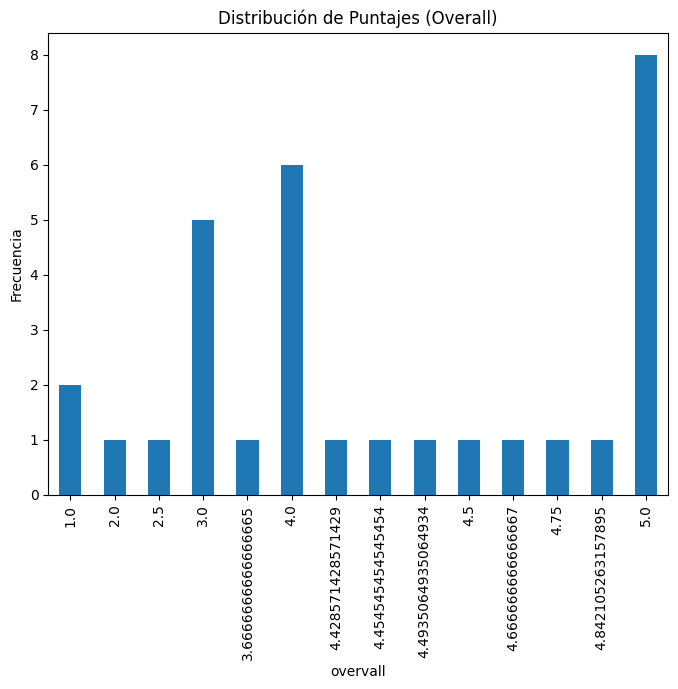

In [62]:


# Crear un gráfico de barras para "overall"
plt.figure(figsize=(8, 6))
df_final['overvall'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('overvall')
plt.ylabel('Frecuencia')
plt.title('Distribución de Puntajes (Overall)')
plt.show()


La categoria tiene un puntaje muy alto en valores generales pero no influye en su volumen de venta

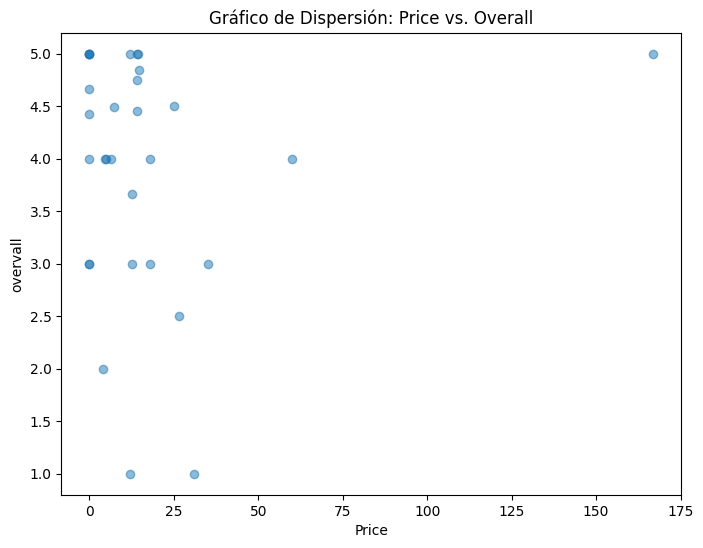

In [67]:
# Crear un gráfico de dispersión para "price" vs. "overall"
plt.figure(figsize=(8, 6))
plt.scatter(df_final['price'], df_final['overvall'], alpha=0.5)
plt.xlabel('Price')
plt.ylabel('overvall')
plt.title('Gráfico de Dispersión: Price vs. Overall')
plt.show()


Se aprecia que no hay una relacion entre el puntaje y el precio del producto que influya en su venta

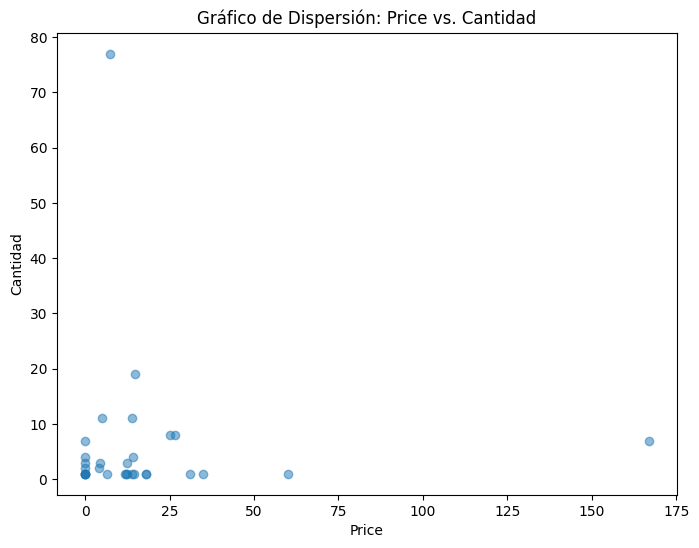

In [66]:
# Crear un gráfico de dispersión para "price" vs. "cantidad"
plt.figure(figsize=(8, 6))
plt.scatter(df_final['price'], df_final['cantidad'], alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Cantidad')
plt.title('Gráfico de Dispersión: Price vs. Cantidad')
plt.show()


Aca se puede apreciar que un producto barato pero que se vendio como mucho volumnen  y puedo recaudar mas que algunos productos con precios mas alto queda revisar si es correcto el valor
por ser un valor atipico

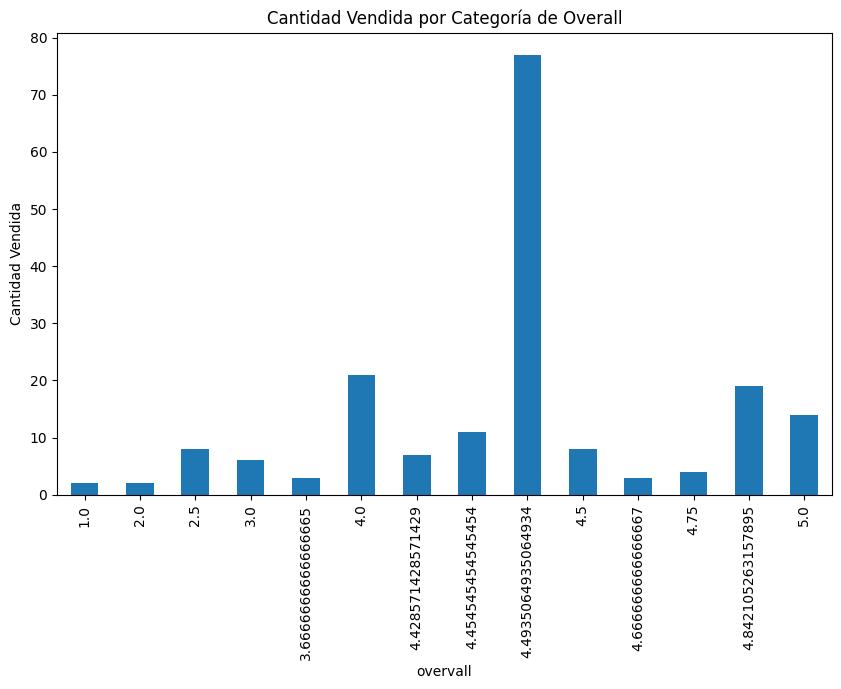

In [69]:
# Crear un gráfico de barras apiladas para contar la cantidad de ventas por categoría de "overall"
plt.figure(figsize=(10, 6))
df_final.groupby('overvall')['cantidad'].sum().plot(kind='bar', stacked=True)
plt.xlabel('overvall')
plt.ylabel('Cantidad Vendida')
plt.title('Cantidad Vendida por Categoría de Overall')
plt.show()


No hay una fuerte relacion pero se puede notar la tendencia uqe cuando el overvall promedio es mayor a 4 es cuando mas se vende el producto

In [70]:
reviews_Tools_and_Home=pd.read_parquet('reviews_Tools_and_Home_Improvement2.parquet')
meta_Tools=pd.read_parquet('meta_Tools_and_Home_Improvement2.parquet')

In [71]:
columna = 'price'
meta_Tools[columna].fillna(0, inplace=True)

In [72]:
fecha_inicio = 1072915200  # 1 de enero de 2004 en formato Unix
fecha_fin = 1420070400      # 31 de diciembre de 2013 en formato Unix

# Filtra las filas dentro del rango de fechas
df_filtrado = reviews_Tools_and_Home[(reviews_Tools_and_Home['unixReviewTime'] >= fecha_inicio) & (reviews_Tools_and_Home['unixReviewTime'] <= fecha_fin)]

In [73]:
cantidad = df_filtrado['asin'].value_counts().reset_index()
cantidad.columns = ['asin', 'cantidad']

# Calcular el promedio de 'overall' para cada 'asin' en df_reviews
promedio_overall = df_filtrado.groupby('asin')['overall'].mean().reset_index()
promedio_overall.columns = ['asin', 'overall']

# Combinar la información de cantidad y promedio_overall con df_meta
df_final = pd.merge(meta_Tools[['asin', 'title', 'price']], cantidad, on='asin', how='left')
df_final = pd.merge(df_final, promedio_overall, on='asin', how='left')

# Renombrar las columnas
df_final.rename(columns={'asin': 'assin', 'title': 'title', 'price': 'price', 'cantidad': 'cantidad', 'overall': 'overvall'}, inplace=True)

# Llenar los valores nulos en 'overvall' con 0 si lo deseas
df_final['overvall'].fillna(0, inplace=True)

In [74]:
df_final = df_final.dropna(subset=['cantidad'])

In [75]:
df_final

,assin,title,price,cantidad,overvall
1,0205062040,NATIONAL NAIL 345002 Marksman Pro Tool,51.31,8.0,4.750000
2,0615247881,Pen Turning with Barry Gross A Visual Guide To...,0.00,1.0,5.000000
3,0955793505,Trend BOOK/CR Complete Routing Techniques and ...,36.33,2.0,3.500000
4,0963469142,Five Crowns,12.04,10.0,5.000000
5,0980966043,&quot;Making Shaker Oval Boxes with Brent Rour...,9.03,1.0,5.000000
...,...,...,...,...,...
280,9896008310,Modern House The Wisdom Woman Tree and Green L...,0.00,1.0,3.000000
281,9896008191,Modern House Autumn Tree and Birds removable V...,0.00,1.0,2.000000
282,9896008388,Modern House Monkey Land with Hot Balloons rem...,0.00,1.0,5.000000
283,9980451327,Geological Hammer - Children's 100g,17.72,2.0,3.000000


In [76]:
# Calcular el monto total por producto
df_final['monto_total'] = df_final['cantidad'] * df_final['price']

# Calcular el total vendido
total_vendido = df_final['cantidad'].sum()

# Calcular el monto total en dinero
monto_total_dinero = df_final['monto_total'].sum()

print(f"El total vendido en el conjunto de datos es: {total_vendido}")
print(f"El monto total en dinero es: ${monto_total_dinero:.2f}")

El total vendido en el conjunto de datos es: 2279.0
El monto total en dinero es: $36766.97


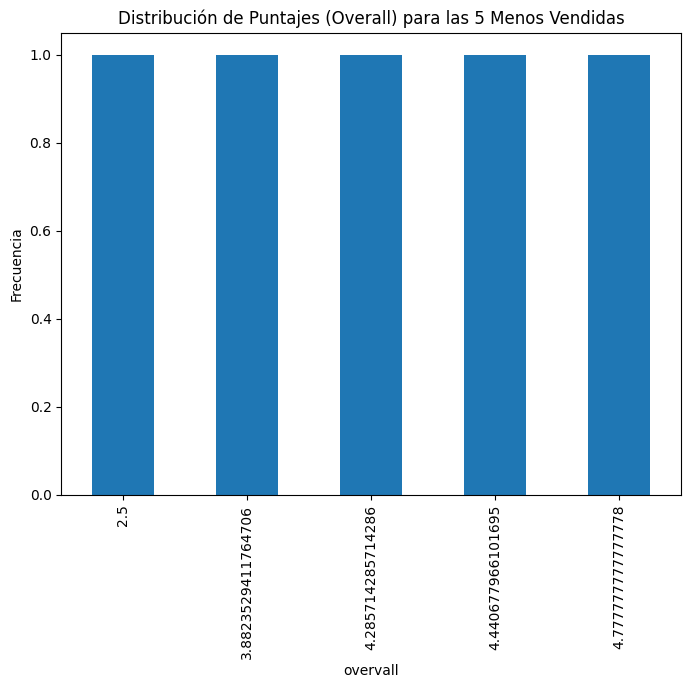

In [79]:
# Crear un gráfico de barras para "overall"
top_5_lowest_sales = df_final['overvall'].value_counts().nsmallest(5).index
filtered_df = df_final[df_final['overvall'].isin(top_5_lowest_sales)]

# Crear un gráfico de barras para las categorías filtradas
plt.figure(figsize=(8, 6))
filtered_df['overvall'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('overvall')
plt.ylabel('Frecuencia')
plt.title('Distribución de Puntajes (Overall) para las 5 Menos Vendidas')
plt.show()


Acá se puede ver que tener un buen no asegurea que el producto se venda mucho

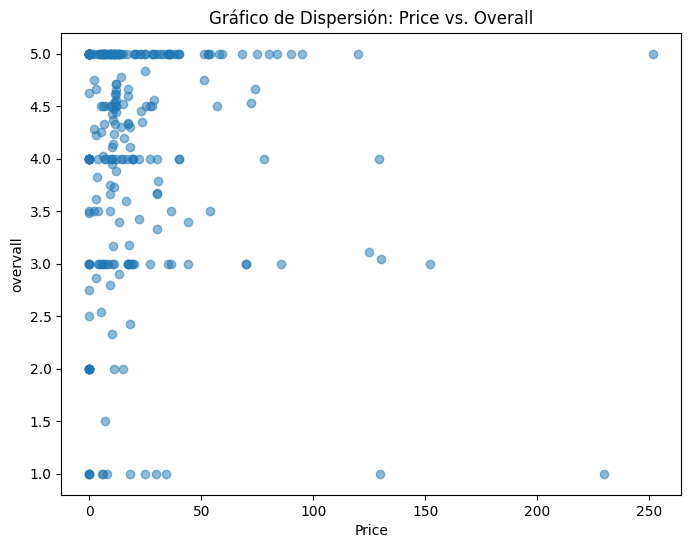

In [80]:
# Crear un gráfico de dispersión para "price" vs. "overall"
plt.figure(figsize=(8, 6))
plt.scatter(df_final['price'], df_final['overvall'], alpha=0.5)
plt.xlabel('Price')
plt.ylabel('overvall')
plt.title('Gráfico de Dispersión: Price vs. Overall')
plt.show()

Se puede ver que un precio barato vende mas a medida que tiene mayor puntaje que es lo que marca este grafico que esta muy volvado a la izquierda y el overall no influye en el precio

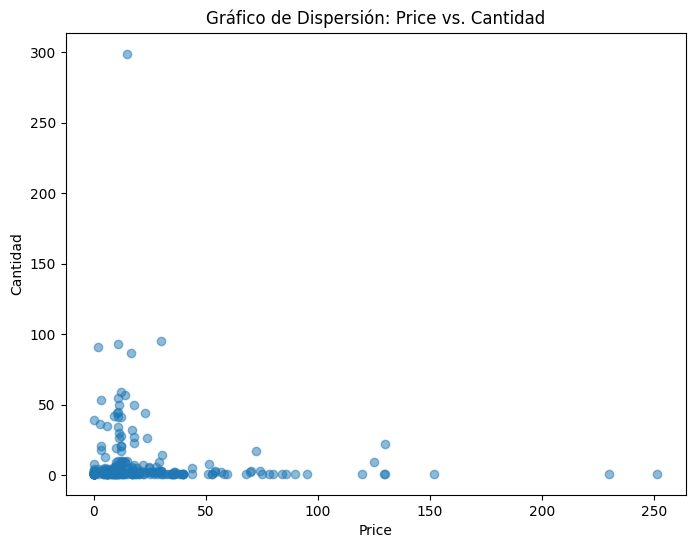

In [81]:
# Crear un gráfico de dispersión para "price" vs. "cantidad"
plt.figure(figsize=(8, 6))
plt.scatter(df_final['price'], df_final['cantidad'], alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Cantidad')
plt.title('Gráfico de Dispersión: Price vs. Cantidad')
plt.show()

Hay una fuerte concentración de precios bajo y una gran cantidad de productos vendidos

<Figure size 1000x600 with 0 Axes>

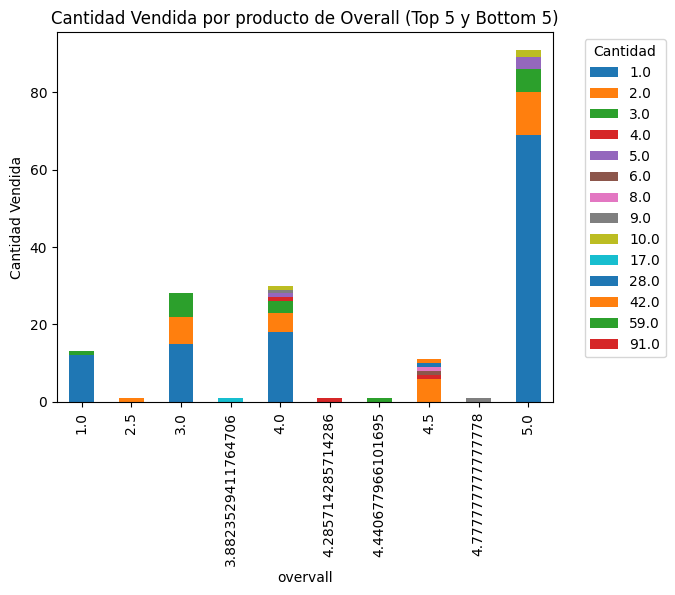

In [85]:
top_5_highest_sales = df_final['overvall'].value_counts().nlargest(5).index

# Obtener las 5 categorías de "overall" menos vendidas
top_5_lowest_sales = df_final['overvall'].value_counts().nsmallest(5).index

# Filtrar el DataFrame para incluir solo las categorías seleccionadas
filtered_df = df_final[df_final['overvall'].isin(top_5_highest_sales) | df_final['overvall'].isin(top_5_lowest_sales)]

# Crear un gráfico de barras apiladas para la cantidad vendida
plt.figure(figsize=(10, 6))
pivot_df = filtered_df.pivot_table(index='overvall', columns='cantidad', aggfunc='size', fill_value=0)
pivot_df.plot(kind='bar', stacked=True)
plt.xlabel('overvall')
plt.ylabel('Cantidad Vendida')
plt.title('Cantidad Vendida por producto de Overall (Top 5 y Bottom 5)')
plt.legend(title='Cantidad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()




La categoria Tools_and_Home_Improvement marca que el overvall no marca tendencias en ventas productos muy bien calificado se venden poco y la tendencia son los productos con precios bajos.

Ahora se van a utilizar los DataSets de arts, electronics, movies_tv y software, con sus metadata para hacer el análisis de estos datos.

In [2]:
reviews = [r'rev_parquet\rev_arts.parquet', r'rev_parquet\rev_electronics.parquet', r'rev_parquet\rev_movies_tv.parquet', r'rev_parquet\rev_software.parquet']
metadata = ['meta_parquet\meta_arts.parquet', 'meta_parquet\meta_electronics.parquet', 'meta_parquet\meta_movie.parquet', 'meta_parquet\meta_software.parquet']

## Tratamiento de duplicados

### Reviews

In [3]:
dataframes = []
for w in reviews:
    df = pd.read_parquet(w)
    dataframes.append(df)

In [4]:
joined_dfs = pd.concat(dataframes)

In [14]:
joined_dfs.shape

(3989389, 7)

In [8]:
joined_dfs[joined_dfs.duplicated(subset=['reviewerID','reviewText','unixReviewTime'])]

,reviewerID,asin,reviewText,overall,summary,unixReviewTime,temp
79254,A23O8T3LNL9YY8,B00020X94M,I bought this video because I do know how to k...,4.0,Very Informative but....,1106611200,2005-01-25
97850,A20EEWWSFMZ1PN,B00020X94M,I purchased this DVD because I thought I might...,5.0,I had no idea!,1113523200,2005-04-15
124987,AYPCGRSNA2IL,6301977173,I would love to buy this movie as I have been ...,1.0,Why no Widescreen?,1123286400,2005-08-06
157040,A25MN5DG191IL6,B00020X94M,The background music for much of the DVD is no...,1.0,I could not hear a thing they said.,1134345600,2005-12-12
161760,A28ZDT16XR5DPC,B00020X94M,For Christmas I wanted to get my wife some vid...,1.0,Its too bad I can not give 0 stars.,1135987200,2005-12-31
...,...,...,...,...,...,...,...
285646,A1M7Y63Y5GYJI1,B00JC5Y6YA,"First, I'm both an OpenOffice and a Microsoft ...",4.0,Great Alternative to MS Office,1404691200,NaT
285649,A2XSDXVXI466XL,B00JC5Y6YA,I occasionally need to use MS Word (my univers...,5.0,Still the best word processing program,1401321600,NaT
285650,A10H24TDLK2VDP,B00JC5Y6YA,My last MS Office suite was Office 2010. Like ...,5.0,A solid alternative to MS Office,1402099200,NaT
285651,A10U8DJAPJJI8I,B00JC5Y6YA,I had previously written a review on this item...,3.0,Office On The Cheap,1404000000,NaT


In [11]:
joined_dfs[joined_dfs.duplicated(keep='first')].sort_values('unixReviewTime')

### Metadata

In [5]:
metadata_dfs = []
for x in metadata:
    df = pd.read_parquet(x)
    metadata_dfs.append(df)

In [6]:
joined_metadfs = pd.concat(metadata_dfs)

In [19]:
joined_metadfs.shape

(552540, 8)

In [20]:
joined_dfs.asin.nunique()

241982

In [18]:
joined_metadfs[joined_metadfs.duplicated(subset=['asin'])]

,asin,related,title,price,salesRank,brand,categories,description
4254,093527863X,"{'also_bought': ['0935278621', '0935278966', '...",Pants for Real People: Sewing Techniques,22.46,"{'Arts, Crafts & Sewing': None, 'Books': None,...",None,"[[Arts, Crafts & Sewing, Sewing], [Movies & TV...",Providing helpful commentary&#160;for creating...
5692,1440305234,"{'also_bought': ['1440319286', '1440319294', '...",Painting Oil Portraits in Warm Light with Chri...,28.28,"{'Arts, Crafts & Sewing': None, 'Books': None,...",None,"[[Arts, Crafts & Sewing, Art Supplies, Paintin...",YouaTMll Love This Portrait Painting DVD If: Y...
5693,144030307X,"{'also_bought': ['1440327033', '1581808046', '...",Nancy Reyner's Acrylic Revolution: Watercolor ...,26.99,"{'Arts, Crafts & Sewing': None, 'Books': None,...",None,"[[Arts, Crafts & Sewing, Art Supplies, Paintin...","Many exciting, new and contemporary looks can ..."
5695,1440307822,None,Drawing the Clothed Figure with Joy Thomas,26.99,"{'Arts, Crafts & Sewing': None, 'Books': None,...",None,"[[Arts, Crafts & Sewing, Art Supplies, Paintin...",Follow along as Joy demonstrates drawing a ful...
5697,144030713X,"{'also_bought': ['1440307105', '144030839X', '...",Three Stages for Successful Pastel Paintings w...,26.99,"{'Arts, Crafts & Sewing': None, 'Books': None,...",None,"[[Arts, Crafts & Sewing, Craft Supplies, Weavi...",You'll Love This Pastel Painting DVD If: You l...
...,...,...,...,...,...,...,...,...
12125,B001JH7FFQ,None,None,NaN,"{'Arts, Crafts & Sewing': None, 'Automotive': ...",None,"[[Movies & TV, Movies], [Software, Design & Il...",DV Award of Excellence- 5 Diamonds! I admit it...
14881,B004YG7JPK,"{'also_bought': None, 'also_viewed': ['B0084JD...",None,49.99,"{'Arts, Crafts & Sewing': None, 'Automotive': ...",None,"[[Movies & TV, Movies], [Software, Design & Il...",Photographer David Hobby of Strobist.com follo...
14883,B004YG7J78,"{'also_bought': ['0321580141', 'B0009BX0AM', '...",None,35.83,"{'Arts, Crafts & Sewing': None, 'Automotive': ...",None,"[[Movies & TV, Movies], [Software, Design & Il...","For the past three decades, photographer Joe M..."
15606,B006C9CEA2,"{'also_bought': ['B00B4AUF3M', 'B007R83VKE', '...",None,49.99,"{'Arts, Crafts & Sewing': None, 'Automotive': ...",None,"[[Arts, Crafts & Sewing, Scrapbooking], [Softw...",This card contains a scratch-off license key c...


## Nulos

### Reviews

In [27]:
joined_dfs.isna().sum()

reviewerID        0
asin              0
reviewText        0
overall           0
summary           0
unixReviewTime    0
dtype: int64

In [28]:
joined_dfs.shape

(3989389, 6)

### Metadata

In [23]:
joined_metadfs.isna().sum()

asin                0
related        141569
title          219743
price          137298
salesRank       14667
brand          439529
categories          0
description     72043
dtype: int64

In [24]:
joined_metadfs.shape

(552540, 8)

se observa que revies no contiene nulos y los nulos presentes en el metadata serán filtrados o ignorados en su debido momento.

# Distribución de datos

## Reviews

In [29]:
joined_dfs['year'] = joined_dfs['unixReviewTime'].apply(lambda x: datetime.fromtimestamp(x).year)
joined_dfs['month'] = joined_dfs['unixReviewTime'].apply(lambda x: datetime.fromtimestamp(x).month)

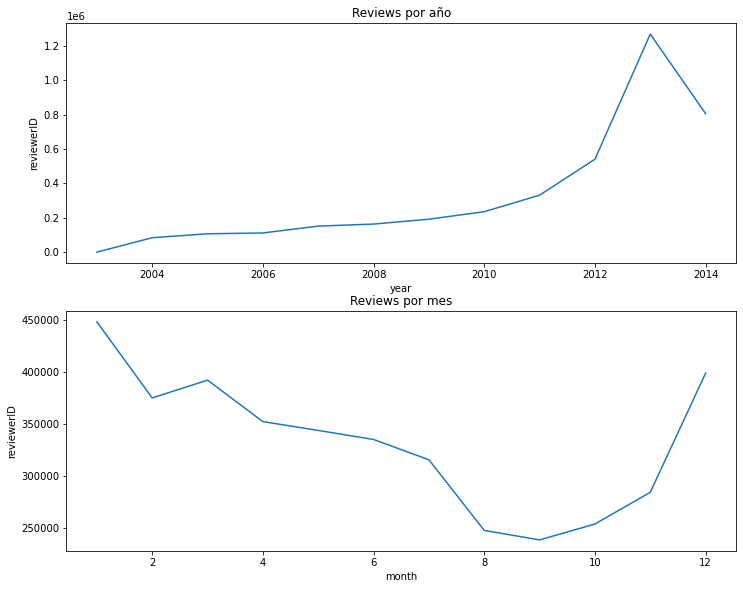

In [30]:
plt.figure(figsize=(12,15))
plt.subplot(3,1,1)
plt.title('Reviews por año')
sns.lineplot(data=joined_dfs.groupby('year').count(),
             x='year',
             y='reviewerID')

plt.subplot(3,1,2)
plt.title('Reviews por mes')
sns.lineplot(data=joined_dfs.groupby('month').count(),
             x='month',
             y='reviewerID'
)

plt.show()

### Calificaciones

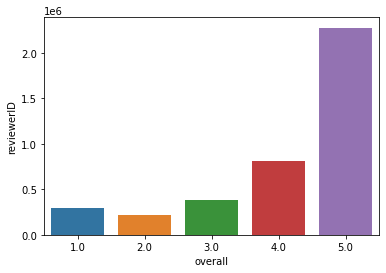

In [7]:
sns.barplot(
    data=joined_dfs.groupby('overall').count().reset_index(),
    x='overall',
    y='reviewerID'
)
plt.show()

Promedio de reviews cor cada usuario

In [8]:
joined_dfs.groupby('reviewerID').count()['asin'].mean()

5.01180781861261

## Metadata

Distribución de precios

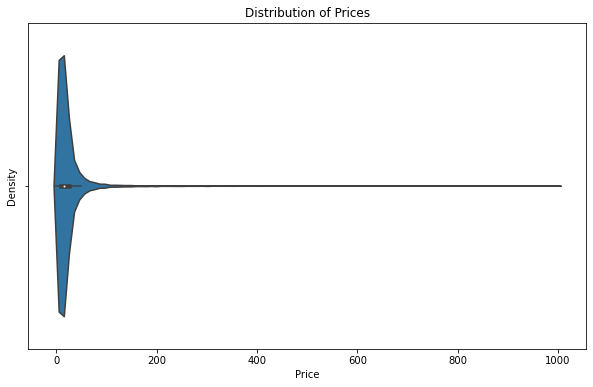

In [17]:
plt.figure(figsize=(10, 6))

sns.violinplot(data=joined_metadfs, x='price')

plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

Finalmente, se van a analizar los conjuntos de datos de Luxury_Beauty, Digital_Music, Sports_and_Outdoors, Toys_and_Games y Video_Games; al igual que sus archivos de metadata correspondientes.

Review

In [4]:
reviews_Luxury_Beauty=pd.read_parquet('Data_parquet/reviews_Luxury_Beauty.parquet')
reviews_Digital_Music=pd.read_parquet('Data_parquet/reviews_Digital_Music.parquet')


In [5]:
reviews_Sports_and_Outdoors=pd.read_parquet('Data_parquet/reviews_Sports_and_Outdoors.parquet')

In [6]:
reviews_Toys_and_Games=pd.read_parquet('Data_parquet/reviews_Toys_and_Games.parquet')

In [17]:
reviews_Video_Games=pd.read_parquet('Data_parquet/reviews_Video_Games.parquet')

In [ ]:
Data

In [11]:
meta_Digital_Music=pd.read_parquet('Data_parquet/meta_Digital_Music.parquet')

In [12]:
meta_Sports_and_Outdoors=pd.read_parquet('Data_parquet/meta_Sports_and_Outdoors.parquet')

In [13]:
meta_Toys_and_Games=pd.read_parquet('Data_parquet/meta_Toys_and_Games.parquet')

In [16]:
meta_Video_Games=pd.read_parquet('Data_parquet/meta_Video_Games.parquet')

In [61]:
meta_Luxury_Beauty=pd.read_parquet('Data_parquet/meta_Luxury_Beauty.parquet')



Trabajamos un poco con el dataset de Luxury Beauty

In [18]:
meta_Luxury_Beauty

,asin,description,title,imUrl,salesRank,categories,related,price,brand
0,b0000531en,if you haven't experienced the pleasures of ba...,"ahava bath salts, 32 oz.",http://ecx.images-amazon.com/images/i/114bhgjt...,{'beauty': 276766},[['luxury beauty']],nan,NaN,nan
1,b0000532jh,"rich, black mineral mud, harvested from the ba...","ahava dead sea mineral mud, 8.5 oz., pack of 4",http://ecx.images-amazon.com/images/i/41o1luez...,{'beauty': 311791},[['luxury beauty']],nan,NaN,nan
2,b00005k3l6,this rich-textured body cream absorbs easily t...,"ahava dermud intensive nourishing body cream, ...",http://ecx.images-amazon.com/images/i/21a3uh87...,{'beauty': 239746},[['luxury beauty']],{'also_bought': ['b004suy43w']},NaN,nan
3,b00005r7zy,highly concentrated formula created to rejuven...,"ahava dermud intensive nourishing hand cream, ...",http://ecx.images-amazon.com/images/i/31bztcdr...,{'beauty': 258465},[['luxury beauty']],"{'also_bought': ['b004suy46e', 'b004suy43w']}",NaN,nan
4,b00005r7zz,"winter, summer, spring or fall, this soothing ...","ahava dermud enriched intensive foot cream, 4....",http://ecx.images-amazon.com/images/i/31geqrj3...,{'beauty': 256450},[['luxury beauty']],nan,NaN,nan
...,...,...,...,...,...,...,...,...,...
1921,b00kwh5dmq,,em michelle phan makeup mood enhancer illumina...,http://ecx.images-amazon.com/images/i/31p191kw...,{'beauty': 62448},[['luxury beauty']],"{'also_bought': ['b00kwhfkhe'], 'also_viewed':...",23.0,nan
1922,b00kwh5bo6,inspired by the girl who doesn&#x2019;t want t...,"em michelle phan eye primer, 0.15 fl. oz.",http://ecx.images-amazon.com/images/i/31draqpr...,{'beauty': 61165},[['luxury beauty']],"{'also_viewed': ['b00kwhfkhe', 'b00l31n75k', '...",15.0,nan
1923,b00kwhg0ak,inspired by the girls who like to speak with t...,em michelle phan scribble calligraphy liquid l...,http://ecx.images-amazon.com/images/i/314lbptx...,{'beauty': 64628},[['luxury beauty']],"{'also_bought': ['b00l31ncdw', 'b00lb749gw', '...",18.0,nan
1924,b00kwhf2dq,inspired by the girl who needs a little extra ...,em michelle phan the great cover up ultimate c...,http://ecx.images-amazon.com/images/i/31bdc-yq...,{'beauty': 174665},[['luxury beauty']],"{'also_bought': ['b00l31ncdw', 'b00l31lzf4', '...",17.0,nan


Tomaremos como 0 los productos sin precio

In [19]:
columna = 'price'
meta_Luxury_Beauty[columna].fillna(0, inplace=True)

In [21]:
#vemos el maximo valor de los productos
max_price = meta_Luxury_Beauty['price'].max()

In [22]:
max_price 

355.0

In [31]:
promedio = meta_Luxury_Beauty['price'].mean()

In [32]:
promedio

25.479029075804778

In [23]:
reviews_Luxury_Beauty

,overall,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime
0,5,a2jp96wirf6yu7,b0000531en,"dean ""dean""",i love ahava products. these bath salts do an...,excellent job softening the skin,1220745600
1,5,a3m174ic0vxos2,b0000531en,gail cooke,don't have time (or the dollars) to go to a sp...,a super salubrious soak!,1030147200
2,3,a26d4mx45wie4z,b0000531en,jamie,"i have only used it once so far, so not sure h...",over priced,1332201600
3,5,a27sn7e55wmsqa,b0000531en,"jb ""purse lover!""",i love my bubble baths. i add these salts to m...,wonderful product!,1209859200
4,5,a1l6q8e1pnmn2g,b0000531en,mary ingram,i broke my hip in '99 and since then it seems ...,"for aching bones, ahava is pure bliss",1209254400
...,...,...,...,...,...,...,...
19942,5,am6n8t50541eb,b00kwhf2dq,devon roy,"this is the best concealer i've ever used, it ...",this is the best concealer i've ever used,1405296000
19943,2,ak31bjki1yc2d,b00kwhf2dq,elaine lim,very sticky and breaks me out.,not a good concealer,1405036800
19944,5,a1v2x3hjei7e80,b00kwhf2dq,michelle,it covers blemishes and dark circles really we...,five stars,1404864000
19945,4,a2u4w4g5suptv,b00kwhf2dq,ngoc vo,does a good job covering up my dark circles un...,does a good job covering up my dark circles un...,1405036800


In [27]:


# Primero, combinamos los DataFrames en función de la columna 'asin'
combined_df = pd.merge(reviews_Luxury_Beauty, meta_Luxury_Beauty, on='asin', how='inner')

# Conviertimos las columnas de tiempo Unix a objetos de fecha
combined_df['reviewDate'] = pd.to_datetime(combined_df['unixReviewTime'], unit='s')

# Filtramos las revisiones dentro del rango de tiempo (2004-2014)
start_date = pd.Timestamp('2004-01-01')
end_date = pd.Timestamp('2014-12-31')
filtered_df = combined_df[(combined_df['reviewDate'] >= start_date) & (combined_df['reviewDate'] <= end_date)]

# Luego, cuenta la cantidad de revisiones por 'asin' en el rango de tiempo
reviews_count = filtered_df['asin'].value_counts()

# Obtenemos los 'asin' de los productos con más revisiones (top 5)
top_products_asin = reviews_count.head(5).index

# Filtramos el DataFrame combinado para obtener los datos de los productos en el top 5
top_products_data = combined_df[combined_df['asin'].isin(top_products_asin)]

# Seleccionamos las columnas 'asin' y 'price' para mostrar
result = top_products_data[['asin', 'price']].drop_duplicates()






In [28]:
result

,asin,price
8134,b0027uy3ig,30.21
9237,b002u0kusu,28.00
9890,b002uxrdms,11.00
10854,b0031nne56,20.00
17765,b008xnjxxq,42.00


Vemos que los productos mas vendidos estan aproximadamente en el promedio del precio de los productos de las categorias

In [35]:

# Calcula el promedio de 'overall' por 'asin' para los productos en 'result'
average_overall_by_product = reviews_Luxury_Beauty[reviews_Luxury_Beauty['asin'].isin(result['asin'])].groupby('asin')['overall'].mean().reset_index()

# Imprime el resultado
print(average_overall_by_product)



         asin   overall
0  b0027uy3ig  4.226044
1  b002u0kusu  4.479705
2  b002uxrdms  4.113772
3  b0031nne56  4.300151
4  b008xnjxxq  4.757709


Observamos que los overall son muy altos para las categorias mas vendidas, es posible que las altas calificaciones contribuyan a una mejor venta.

In [37]:
reviews_Digital_Music.head(10)

,overall,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime
0,4,a3pmsrcl80ksa1,0000031852,dee,tutus are cute but a little thin. can't compla...,not bad,1388275200
1,4,a1snlwglfxd70k,0000031852,deva,i origonally didn't get the item i ordered. w...,happy with purchase even though it came a lot ...,1392940800
2,4,a1kj4cvg87qw09,0000031852,donna carter-scott,"arrived very timely, cute grandbaby loves it. ...",cute tutu,1389657600
3,5,aa9ito6zlzw6,0000031852,jazzy77,my little girl just loves to wear this tutu be...,versatile,1399507200
4,1,apj5ulj1rmz4,0000031852,kesha wallace,i bought this for my 3 yr old daughter when i ...,would not recommend,1398556800
5,5,a2pavurt4nohe1,0000031852,leah,bought it for a ballet tutu but it is being wo...,super cute,1388361600
6,4,a3urq0lxlv46e9,0000031852,shortyvee,my daughter and her friends love the colors an...,zebralisous,1400544000
7,4,a2681t699hv6h1,0000031895,courtney riha,very cute and went great with my halloween cos...,loved it!,1384905600
8,2,a2epszkeg06qze,0000031895,katie r.,this tutu is completely see-through. i bought ...,completely see-through,1396224000
9,5,a23k73ovxj04eg,0000031895,"susie mo ""author""",it was as described and fit my 6 year old gran...,neon blue tutu,1391212800


In [39]:
reviews_Digital_Music.shape

(3268695, 7)

In [40]:
reviews_Digital_Music.head(10)

,overall,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime
0,4,a3pmsrcl80ksa1,0000031852,dee,tutus are cute but a little thin. can't compla...,not bad,1388275200
1,4,a1snlwglfxd70k,0000031852,deva,i origonally didn't get the item i ordered. w...,happy with purchase even though it came a lot ...,1392940800
2,4,a1kj4cvg87qw09,0000031852,donna carter-scott,"arrived very timely, cute grandbaby loves it. ...",cute tutu,1389657600
3,5,aa9ito6zlzw6,0000031852,jazzy77,my little girl just loves to wear this tutu be...,versatile,1399507200
4,1,apj5ulj1rmz4,0000031852,kesha wallace,i bought this for my 3 yr old daughter when i ...,would not recommend,1398556800
5,5,a2pavurt4nohe1,0000031852,leah,bought it for a ballet tutu but it is being wo...,super cute,1388361600
6,4,a3urq0lxlv46e9,0000031852,shortyvee,my daughter and her friends love the colors an...,zebralisous,1400544000
7,4,a2681t699hv6h1,0000031895,courtney riha,very cute and went great with my halloween cos...,loved it!,1384905600
8,2,a2epszkeg06qze,0000031895,katie r.,this tutu is completely see-through. i bought ...,completely see-through,1396224000
9,5,a23k73ovxj04eg,0000031895,"susie mo ""author""",it was as described and fit my 6 year old gran...,neon blue tutu,1391212800


In [38]:
meta_Digital_Music.head(10)

,asin,title,price,related,salesRank,categories,description,brand
0,5555991584,memory of trees,9.49,"{'also_bought': ['b000002lrt', 'b000002lrr', '...",{'music': 939190},"[['cds & vinyl', 'new age', 'celtic new age'],...",nan,nan
1,6308051551,don't drink his blood,8.91,nan,nan,"[['digital music', 'alternative rock', 'indie ...",new combo bluwavs cd and flac file,nan
2,7901622466,on fire,11.33,"{'also_bought': ['b00000282a', 'b0084o8o9s', '...",{'music': 58799},"[['cds & vinyl', 'christian', 'rock & alternat...",nan,nan
3,b0000000zw,changing faces,23.64,"{'also_bought': ['b00000010z', 'b0000039q5', '...",{'music': 68784},"[['cds & vinyl', 'dance & electronic'], ['cds ...",,
4,b00000016w,pet sounds,9.49,"{'also_bought': ['b0025kvltm', 'b00007fomp', '...",{'music': 77205},"[['cds & vinyl', 'classic rock'], ['cds & viny...",nan,nan
5,b00000016t,cars,14.63,"{'also_bought': ['b000002gwx', 'b000002gxd', '...",{'music': 458151},"[['cds & vinyl', 'alternative rock', 'new wave...",nan,nan
6,b0000001ba,harry,9.99,"{'also_bought': ['b0012gn2yw', 'b00004vxg8', '...",{'music': 303202},"[['cds & vinyl', 'folk', 'contemporary folk'],...","a 1969 collection of songs about innocence, ex...",nan
7,b00000017r,jazz samba,8.99,"{'also_bought': ['b0000046wb', 'b0000047cx', '...",{'music': 561174},"[['cds & vinyl', 'jazz', 'bebop'], ['cds & vin...",nan,nan
8,b0000001bo,solar heat,8.99,"{'also_viewed': ['b0000wkpgw', 'b0001lyh1g', '...",{'music': 487309},"[['cds & vinyl', 'jazz', 'bebop'], ['cds & vin...",nan,nan
9,b0000001o0,soulero,14.98,"{'also_bought': ['b005dlbm7q', 'b00000i41j', '...",{'music': 106625},"[['cds & vinyl', 'jazz', 'bebop'], ['cds & vin...",soulero by kenny burrellthis product is manufa...,nan


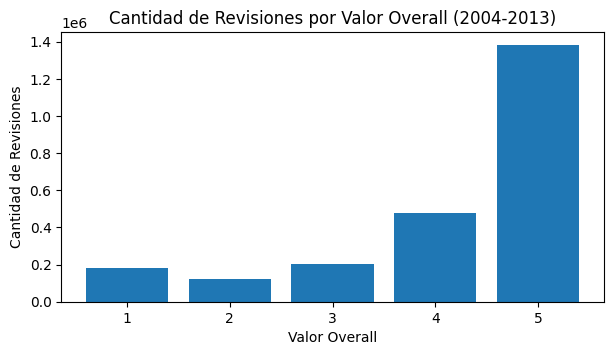

In [43]:

# Convierte la columna 'unixReviewTime' en una columna de fecha
reviews_Digital_Music['reviewDate'] = pd.to_datetime(reviews_Digital_Music['unixReviewTime'], unit='s')

# Filtra las revisiones dentro del rango de tiempo (2004-2013)
start_date = pd.Timestamp('2004-01-01')
end_date = pd.Timestamp('2014-01-01')  # No incluye 2014
filtered_reviews = reviews_Digital_Music[(reviews_Digital_Music['reviewDate'] >= start_date) & (reviews_Digital_Music['reviewDate'] < end_date)]

# Cuenta la cantidad de revisiones para cada valor único en la columna 'overall'
overall_counts = filtered_reviews['overall'].value_counts().sort_index()

# Crea un gráfico de columnas
plt.figure(figsize=(7, 3.5))
plt.bar(overall_counts.index, overall_counts.values)
plt.xlabel('Valor Overall')
plt.ylabel('Cantidad de Revisiones')
plt.title('Cantidad de Revisiones por Valor Overall (2004-2013)')
plt.xticks(overall_counts.index)
plt.show()


Observamos que quizas por la naturaleza de la categoria musica, existe una alta satifaccion en las reseñas hechas

In [44]:
reviews_Sports_and_Outdoors.head(10)


,overall,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime
0,4,a3pmsrcl80ksa1,0000031852,dee,tutus are cute but a little thin. can't compla...,not bad,1388275200
1,4,a1snlwglfxd70k,0000031852,deva,i origonally didn't get the item i ordered. w...,happy with purchase even though it came a lot ...,1392940800
2,4,a1kj4cvg87qw09,0000031852,donna carter-scott,"arrived very timely, cute grandbaby loves it. ...",cute tutu,1389657600
3,5,aa9ito6zlzw6,0000031852,jazzy77,my little girl just loves to wear this tutu be...,versatile,1399507200
4,1,apj5ulj1rmz4,0000031852,kesha wallace,i bought this for my 3 yr old daughter when i ...,would not recommend,1398556800
5,5,a2pavurt4nohe1,0000031852,leah,bought it for a ballet tutu but it is being wo...,super cute,1388361600
6,4,a3urq0lxlv46e9,0000031852,shortyvee,my daughter and her friends love the colors an...,zebralisous,1400544000
7,4,a2681t699hv6h1,0000031895,courtney riha,very cute and went great with my halloween cos...,loved it!,1384905600
8,2,a2epszkeg06qze,0000031895,katie r.,this tutu is completely see-through. i bought ...,completely see-through,1396224000
9,5,a23k73ovxj04eg,0000031895,"susie mo ""author""",it was as described and fit my 6 year old gran...,neon blue tutu,1391212800


In [45]:
meta_Sports_and_Outdoors.head(10)

,asin,title,price,related,brand,categories,salesRank,description
0,0000032069,adult ballet tutu cheetah pink,7.89,"{'also_bought': ['0000032050', 'b00d0djaeg', '...",bububibi,"[['sports & outdoors', 'other sports', 'dance'...",nan,nan
1,0000031909,girls ballet tutu neon pink,7.00,"{'also_bought': ['b002bzx8z6', 'b00jhonn1s', '...",unknown,"[['sports & outdoors', 'other sports', 'dance']]",{'toys & games': 201847},high quality 3 layer ballet tutu. 12 inches in...
2,0000032034,adult ballet tutu yellow,7.87,"{'also_bought': ['b00d2jsrfq', '0000032042', '...",bububibi,"[['sports & outdoors', 'other sports', 'dance'...",nan,nan
3,0000031852,girls ballet tutu zebra hot pink,3.17,"{'also_bought': ['b00jhonn1s', 'b002bzx8z6', '...",coxlures,"[['sports & outdoors', 'other sports', 'dance']]",{'toys & games': 211836},tutu
4,0000032050,adult ballet tutu purple,12.85,"{'also_bought': ['b00d2jsrfq', 'b00d2jtms2', '...",bububibi,"[['sports & outdoors', 'other sports', 'dance'...",nan,nan
5,0000031895,girls ballet tutu neon blue,2.99,"{'also_bought': ['b002bzx8z6', 'b00jhonn1s', '...",bububibi,"[['sports & outdoors', 'other sports', 'dance']]",{'toys & games': 36575},dance tutu for girls ages 2-8 years. perfect f...
6,0188477284,klean kanteen classic stainless steel water bo...,NaN,"{'also_viewed': ['b0019n2do8', 'b0093irvde', '...",nan,"[['sports & outdoors', 'accessories', 'sports ...",{'sports &amp; outdoors': 338400},keep yourself hydrated with the reusable klean...
7,0531904822,police protect &amp; serve gun shape spring as...,14.48,"{'also_viewed': ['b00g1c1p50', 'b005vpydhk', '...",nan,"[['sports & outdoors', 'hunting & fishing', 't...",{'sports &amp; outdoors': 1163159},""" protect & serve "" first production run. heav..."
8,059445039x,blackwatch plaid wool backpack,NaN,nan,nan,"[['sports & outdoors', 'outdoor gear', 'campin...",{'sports &amp; outdoors': 1435322},nan
9,060791548x,medicine bow national forest map - waterproof,18.99,"{'also_bought': ['0974090042', '0762734205', '...",u.s. forest service,"[['sports & outdoors', 'outdoor gear', 'campin...",{'sports &amp; outdoors': 306656},detailed map of medicine bow national forest i...


Veremos la variacion de precios

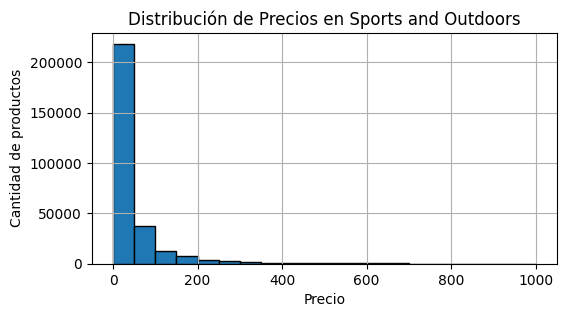

In [47]:

# Elimina las filas con valores faltantes en la columna 'price'
meta_Sports_and_Outdoors = meta_Sports_and_Outdoors.dropna(subset=['price'])

# Convierte la columna 'price' a valores numéricos (si no lo está)
meta_Sports_and_Outdoors['price'] = pd.to_numeric(meta_Sports_and_Outdoors['price'], errors='coerce')

# Filtra los valores nulos en la columna 'price' (si es necesario)
meta_Sports_and_Outdoors = meta_Sports_and_Outdoors.dropna(subset=['price'])

# Crea un histograma de los precios
plt.figure(figsize=(6, 3))
plt.hist(meta_Sports_and_Outdoors['price'], bins=20, edgecolor='k')
plt.xlabel('Precio')
plt.ylabel('Cantidad de productos')
plt.title('Distribución de Precios en Sports and Outdoors')
plt.grid(True)
plt.show()


Existen pocos productos que superan los 200 dolares, vamos a ver que cantidad del total de compras representan

In [48]:


# Filtra el DataFrame meta_Sports_and_Outdoors_Sports_and_Outdoors para obtener productos con precio mayor a $200
productos_altos_precios = meta_Sports_and_Outdoors[meta_Sports_and_Outdoors['price'] > 200]

#  Obtiene los "asin" de los productos con alto precio
asin_productos_altos_precios = productos_altos_precios['asin']

# 3. Filtra el DataFrame "reviews" para obtener las revisiones asociadas a los productos de alto precio
revisiones_productos_altos_precios = reviews_Sports_and_Outdoors[reviews_Sports_and_Outdoors['asin'].isin(asin_productos_altos_precios)]

# 4. Calcula el promedio de personas que compraron los productos de alto precio
promedio_personas_compraron = len(revisiones_productos_altos_precios) / len(asin_productos_altos_precios)

# Imprime el resultado
print(f"El promedio de personas que compraron productos mayores a $200 es: {promedio_personas_compraron}")


El promedio de personas que compraron productos mayores a $200 es: 8.626193137845043


Menos del 10% de las reseñas, son para prductos significativamente caros.

In [50]:


# 1. Filtra el DataFrame "meta" para obtener productos con precio mayor a $200
productos_altos_precios = meta_Sports_and_Outdoors[meta_Sports_and_Outdoors['price'] > 200]

# 2. Obtiene los "asin" de los productos con alto precio
asin_productos_altos_precios = productos_altos_precios['asin']

# 3. Filtra el DataFrame "reviews" para obtener las revisiones asociadas a los productos de alto precio
revisiones_productos_altos_precios = reviews_Sports_and_Outdoors[reviews_Sports_and_Outdoors['asin'].isin(asin_productos_altos_precios)]

# 4. Calcula el promedio de los valores "overall" de las revisiones asociadas a los productos de alto precio
promedio_overall = revisiones_productos_altos_precios['overall'].mean()

# Imprime el promedio de "overall"
print(f"El promedio de 'overall' para productos mayores a $200 es: {promedio_overall}")



El promedio de 'overall' para productos mayores a $200 es: 4.2388599796638555


Los productos "caros" tienen un alto puntaje en las reseñas hechos por los usuarios, lo cual apunta a que la gente que gasto mucho recomienda esos productos.

In [51]:
reviews_Toys_and_Games.head(10)


,overall,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime
0,5,amevo2ly6veja,0000191639,nicole soeder,"great product, thank you! our son loved the pu...",puzzles,1388016000
1,4,a3c9csw3tjitgt,0005069491,renee,i love these felt nursery rhyme characters and...,charming characters but busy work required,1377561600
2,3,a31potiycksz9g,0076561046,so ca teacher,i see no directions for its use. therefore i h...,no directions for use...,1404864000
3,5,a2gghhme9b6w4o,0131358936,dalilah g.,this is a great tool for any teacher using the...,great cd-rom,1382400000
4,5,a1fsldh43orwzp,0133642984,dayna english,although not as streamlined as the algebra i m...,algebra ii -- presentation materials,1374278400
5,5,a3nxhtsebx9yhb,0279515766,marlenetbueras,i am glad to get it after 25 yr of waiting for...,my strawberry shortcake,1363564800
6,5,ayvr1mqctnu5d,0375829695,annie,what a great theme for a puzzle book. my daugh...,so cute!!,1291939200
7,1,a3cjhkfhhqjp2k,0375829695,"beth sharo ""bookmom""",my son got this book for his birthday. he lov...,disappointing puzzle book,1297209600
8,3,a3638finp26e8n,0375829695,c. boykin,love the book format. my 4yr old grandson love...,frustrating puzzle pieces,1282521600
9,4,aut7723o49vmn,0375829695,cindy lindy,i'm a 2nd grade teacher. my students found th...,challenging and fun,1237766400


In [52]:
meta_Toys_and_Games.head(10)

,asin,description,title,price,salesRank,brand,categories,related
0,0000191639,"three dr. suess' puzzles: green eggs and ham, ...",dr. suess 19163 dr. seuss puzzle 3 pack bundle,37.12,{'toys & games': 612379},dr. seuss,"[['toys & games', 'puzzles', 'jigsaw puzzles']]",nan
1,0005069491,nan,nursery rhymes felt book,NaN,{'toys & games': 576683},nan,[['toys & games']],nan
2,0076561046,learn fractions decimals percents using flash ...,fraction decimal percent card deck,NaN,{'toys & games': 564211},nan,"[['toys & games', 'learning & education', 'fla...",{'also_viewed': ['0075728680']}
3,0131358936,"new, sealed. fast shipping with tracking, buy ...",nan,36.22,{'software': 8080},nan,"[['toys & games', 'learning & education', 'mat...","{'also_bought': ['0321845536', '0078787572'], ..."
4,0133642984,nan,algebra 2 california teacher center,731.93,{'toys & games': 1150291},prentice hall,"[['toys & games', 'learning & education', 'mat...",nan
5,0279515766,nan,vintage 1982 strawberry shortcake doll,NaN,{'toys & games': 1506850},nan,"[['toys & games', 'dolls & accessories', 'doll...",nan
6,0375829695,"a collection of six 48-piece (that is,slightly...",dr. seuss jigsaw puzzle book: with six 48-piec...,24.82,{'home &amp; kitchen': 590975},dr. seuss,"[['toys & games', 'puzzles', 'jigsaw puzzles']]","{'also_viewed': ['1865036013', 'b004ub2dv4', '..."
7,037585746x,originally published as two books in slightly ...,blues clues on the go with blue color &amp; ac...,NaN,{'toys & games': 417399},nan,"[['toys & games', 'arts & crafts', 'drawing & ...","{'also_bought': ['b0050drml2', 'b000fci1z4', '..."
8,0425066169,game,sanctuary: the thieves' world boardgame [box set],NaN,{'toys & games': 413781},nan,"[['toys & games', 'games', 'board games']]",{'also_viewed': ['0912771976']}
9,0439028485,clifford the big red dog has been a beloved cl...,clifford the big red dog: 10-piece counting &a...,NaN,{'toys & games': 427475},nan,"[['toys & games', 'learning & education', 'ear...",nan


Veremos si existe alguna relacion entre los overall y los precios de los productos

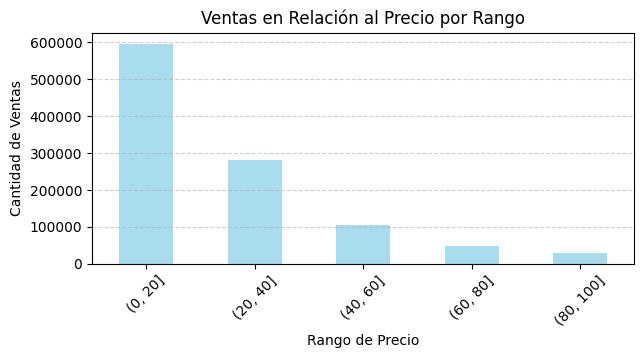

In [59]:

# 1. Fusiona (combina) los DataFrames en base a la columna 'asin'
merged_df = pd.merge(reviews_Toys_and_Games, meta_Toys_and_Games, on='asin', how='inner')

# 2. Define los límites de los rangos de precios
rangos_precios = [0, 20, 40, 60, 80, 100]

# 3. Utiliza 'pd.cut' para agrupar los productos en los rangos de precios
merged_df['rango_precio'] = pd.cut(merged_df['price'], bins=rangos_precios)

# 4. Cuenta cuántas ventas están en cada rango de precios
ventas_por_rango = merged_df['rango_precio'].value_counts().sort_index()

# 5. Crea el gráfico de barras
plt.figure(figsize=(7, 3))
ventas_por_rango.plot(kind='bar', color='skyblue', alpha=0.7)
plt.xlabel('Rango de Precio')
plt.ylabel('Cantidad de Ventas')
plt.title('Ventas en Relación al Precio por Rango')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


Mas del doble de ventas se realizan en productos gratuitos o muy baratos, mientras que las compras disminuyen significativamente con el aumento de precio

Veremos como se distribuyen en los distintos dataset, el puntaje por cada categoria

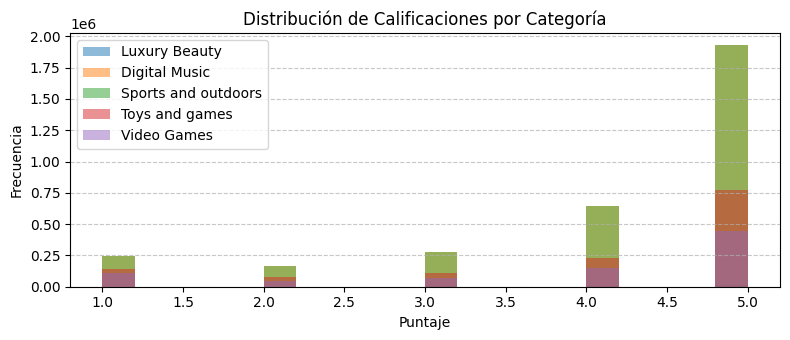

In [65]:
# Extraer el overall de cada DataSet
scores_Luxury_Beauty = list(reviews_Luxury_Beauty['overall'])
scores_Digital_Music = list(reviews_Digital_Music['overall'])
scores_Sports_and_Outdoors = list(reviews_Sports_and_Outdoors['overall'])
scores_Toys_and_Games = list(reviews_Toys_and_Games['overall'])
scores_Video_Games = list(reviews_Video_Games['overall'])

# Lista de puntuaciones de cada DataFrame
scores = [scores_Luxury_Beauty, scores_Digital_Music, scores_Sports_and_Outdoors, 
          scores_Toys_and_Games, scores_Video_Games]

# Nombres de las categorías
categories = ['Luxury Beauty', 'Digital Music', 'Sports and outdoors',
              'Toys and games', 'Video Games']

# Crear un gráfico de barras
plt.figure(figsize=(8, 3.5))  # Ajusta el tamaño del gráfico
for i, category_scores in enumerate(scores):
    plt.hist(category_scores, bins=20, alpha=0.5, label=categories[i])

plt.title('Distribución de Calificaciones por Categoría')
plt.xlabel('Puntaje')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

En el análisis de la distribución de puntajes por categoría, destaca la categoría "Sports and Outdoors" como la que acumula la mayoría de los puntajes, superando significativamente a las demás. A pesar de no ser la categoría más frecuente, "Video Games" presenta la calificación de 1 estrella en mayor proporción, lo que indica la necesidad de prestar especial atención a esta categoría. Además, se observa una tendencia general hacia calificaciones de 5 estrellas en las demás categorías, aunque es crucial notar que algunas categorías, aunque predominantemente bien calificadas, tienen aproximadamente la mitad de sus reseñas en niveles que no alcanzan la excelencia. Esta información resalta la importancia de analizar detenidamente estas categorías intermedias para entender mejor las opiniones de los usuarios.




